# Output analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from tqdm import tqdm

In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join("../model/"))
if module_path not in sys.path:
    sys.path.append(module_path)

from model_nile import ModelNile
from data_generation import generate_input_data
import plotter

In [3]:
# Change the font type of matplotlib figures to make it match with the report
'''
import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12
'''

'\nimport matplotlib\nimport matplotlib.font_manager as fm\n\n# sns.set(font_scale=1.2)\n\nfm.fontManager.addfont("Minion Pro Regular.ttf")\nmatplotlib.rc("font", family="Minion Pro")\n\nfrom matplotlib import rcParams\n\nrcParams["font.family"] = "Minion Pro"\nrcParams["font.sans-serif"] = "Minion Pro"\nrcParams["font.size"] = 12\n'

Read the results of the optimization:

In [4]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns="Unnamed: 0")
opt_results

v0        v1        v2        v3        v4        v5        v6  \
0    0.000513  0.114183  0.379610  0.222861 -0.912948  0.452649  0.260217   
1    0.005551  0.114852  0.416813  0.215447 -0.673022  0.456056 -0.329024   
2    0.005551  0.114852  0.416813  0.215447 -0.673022  0.456056 -0.318718   
3    0.005551  0.088394  0.579024  0.310944  0.901105  0.007324 -0.289949   
4    0.022721  0.114852  0.416813  0.206873 -0.673022  0.456056 -0.318718   
..        ...       ...       ...       ...       ...       ...       ...   
552  0.326885  0.106877  0.545884  0.336976 -0.668031  0.437772 -0.419885   
553  0.000151  0.028225  0.393737  0.309436 -0.742859  0.191598 -0.376609   
554  0.003841  0.024536  0.447966  0.306452 -0.846223  0.457366 -0.377002   
555  0.001132  0.022049  0.478721  0.308261 -0.747247  0.411032 -0.360748   
556  0.000151  0.028225  0.393737  0.309436 -0.742859  0.191598 -0.376609   

           v7        v8        v9  ...      v160      v161      v162  \
0    0.235133 -0.412399  0.729811  ...  0.361710  0.359652  0.515373   
1    0.234759 -0.018857  0.743872  ...  0.359905  0.096117  0.525507   
2    0.234759 -0.018857  0.743872  ...  0.359905  0.096117  0.706763   
3    0.234686  0.478925  0.421958  ...  0.361385  0.315424  0.521779   
4    0.234759 -0.036241  0.744584  ...  0.386367  0.096117  0.706763   
..        ...       ...       ...  ...       ...       ...       ...   
552  0.869253  0.461072  0.744024  ...  0.376803  0.188286  0.282503   
553  0.230249 -0.751094  0.744065  ...  0.096033  0.027555  0.114251   
554  0.209600  0.481661  0.699339  ...  0.365742  0.065873  0.279207   
555  0.344056 -0.199549  0.360655  ...  0.397008  0.144051  0.298246   
556  0.233875 -0.751094  0.744065  ...  0.096033  0.068354  0.114251   

         v163  egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0    0.375135   5.583528  1.079809       0.541667   0.027608       0.0   
1    0.365050   4.889959  1.355717       0.245833   0.000000       0.0   
2    0.365144   4.668365  1.237320       0.295833   0.000000       0.0   
3    0.395253   8.227111  2.286887       0.012500   0.067783       0.0   
4    0.365144   5.078874  0.863157       0.570833   0.008685       0.0   
..        ...        ...       ...            ...        ...       ...   
552  0.385069   4.992584  0.440134       0.558333   0.087050       0.0   
553  0.397327   4.692767  1.185513       0.633333   0.395626       0.0   
554  0.346387   4.654900  1.393756       0.470833   0.275966       0.0   
555  0.425433   7.540867  1.966258       0.016667   0.362593       0.0   
556  0.397327   4.705627  1.173453       0.637500   0.391764       0.0   

     ethiopia_hydro  
0         14.418962  
1         14.473707  
2         14.373276  
3         15.000933  
4         13.695218  
..              ...  
552       11.162882  
553       15.055595  
554       15.042024  
555       15.062063  
556       15.055337  

[557 rows x 170 columns]

Let's split the policy and objective value dataframes:

In [5]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [6]:
objectives.describe()

egypt_irr    egypt_90  egypt_low_had   sudan_irr    sudan_90  \
count  557.000000  557.000000     557.000000  557.000000  557.000000   
mean     5.661273    1.336727       0.314684    0.190269    0.026025   
std      1.995637    0.606072       0.221348    0.286749    0.083750   
min      3.288710    0.360110       0.000000    0.000000    0.000000   
25%      4.611484    1.010379       0.120833    0.000000    0.000000   
50%      5.125494    1.264032       0.304167    0.080306    0.000000   
75%      6.014132    1.505690       0.475000    0.280558    0.000000   
max     18.508088    4.538554       0.829167    1.633497    0.582877   

       ethiopia_hydro  
count      557.000000  
mean        13.901316  
std          1.399777  
min         10.648433  
25%         13.062857  
50%         14.503303  
75%         15.037574  
max         15.131309

In [7]:
(objectives.sudan_90 > 0).sum()

109

Let's kick out the Sudan 90 objective as no meaningful deficit occured:

In [8]:
# objectives = objectives.drop(columns=["sudan_90"])

Query the policies which yield best performance with respect to each objective:

In [9]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
    else:
        print("issue with directions!")

    best_obj_indices[obj] = indexes

In [10]:
best_obj_indices

{'egypt_irr': Int64Index([483], dtype='int64'),
 'egypt_90': Int64Index([484], dtype='int64'),
 'egypt_low_had': Int64Index([  5,   7,   8,  14,  38,  47,  96, 102, 114, 141, 149, 157, 203,
             229, 253, 262, 265, 339, 389, 390, 422, 456, 467, 489, 499, 507,
             508, 517, 537],
            dtype='int64'),
 'sudan_irr': Int64Index([  1,   2,   9,  10,  16,  17,  19,  20,  21,  25,
             ...
             509, 510, 513, 518, 519, 521, 523, 532, 533, 536],
            dtype='int64', length=140),
 'sudan_90': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             541, 543, 546, 548, 551, 552, 553, 554, 555, 556],
            dtype='int64', length=448),
 'ethiopia_hydro': Int64Index([475], dtype='int64')}

In [11]:
sudan_irr_list = []
for i in range(len(best_obj_indices['sudan_irr'])):
    value = best_obj_indices['sudan_irr'][i]
    sudan_irr_list.append(value)

sudan_irr_list

[1,
 2,
 9,
 10,
 16,
 17,
 19,
 20,
 21,
 25,
 26,
 28,
 29,
 30,
 31,
 34,
 36,
 42,
 46,
 48,
 53,
 54,
 55,
 59,
 66,
 70,
 74,
 76,
 77,
 80,
 81,
 86,
 92,
 93,
 95,
 96,
 102,
 107,
 108,
 116,
 118,
 121,
 123,
 126,
 129,
 136,
 142,
 143,
 144,
 149,
 157,
 158,
 166,
 172,
 176,
 179,
 180,
 181,
 187,
 193,
 199,
 201,
 202,
 204,
 206,
 209,
 220,
 222,
 226,
 227,
 231,
 235,
 237,
 239,
 243,
 247,
 250,
 252,
 253,
 261,
 264,
 276,
 283,
 289,
 291,
 295,
 297,
 299,
 309,
 314,
 318,
 322,
 329,
 341,
 343,
 351,
 353,
 357,
 364,
 367,
 370,
 373,
 374,
 375,
 385,
 387,
 388,
 391,
 395,
 410,
 411,
 414,
 421,
 427,
 429,
 430,
 431,
 435,
 436,
 438,
 455,
 463,
 464,
 466,
 470,
 480,
 490,
 491,
 495,
 497,
 509,
 510,
 513,
 518,
 519,
 521,
 523,
 532,
 533,
 536]

In [12]:
with open('sudan_irr_pols.txt','w') as output:
    output.write(str(sudan_irr_list))

In [13]:
for i in best_obj_indices["sudan_irr"]:
    if i in best_obj_indices["egypt_low_had"]:
        print(i)

96
102
149
157
253


In [14]:
best_egypt_irr = policies.loc[483]
best_egypt_90 = policies.loc[484]
best_egypt_low_had = policies.loc[96]
best_sudan_irr = policies.loc[1] #this was a policy chosen at random - many of sudan's outcomes are ideal
best_ethiopia = policies.loc[475]

In [15]:
objectives.loc[objectives.index == 484]

egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  ethiopia_hydro
484   4.748317   0.36011       0.495833   0.123097       0.0       11.037404

Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

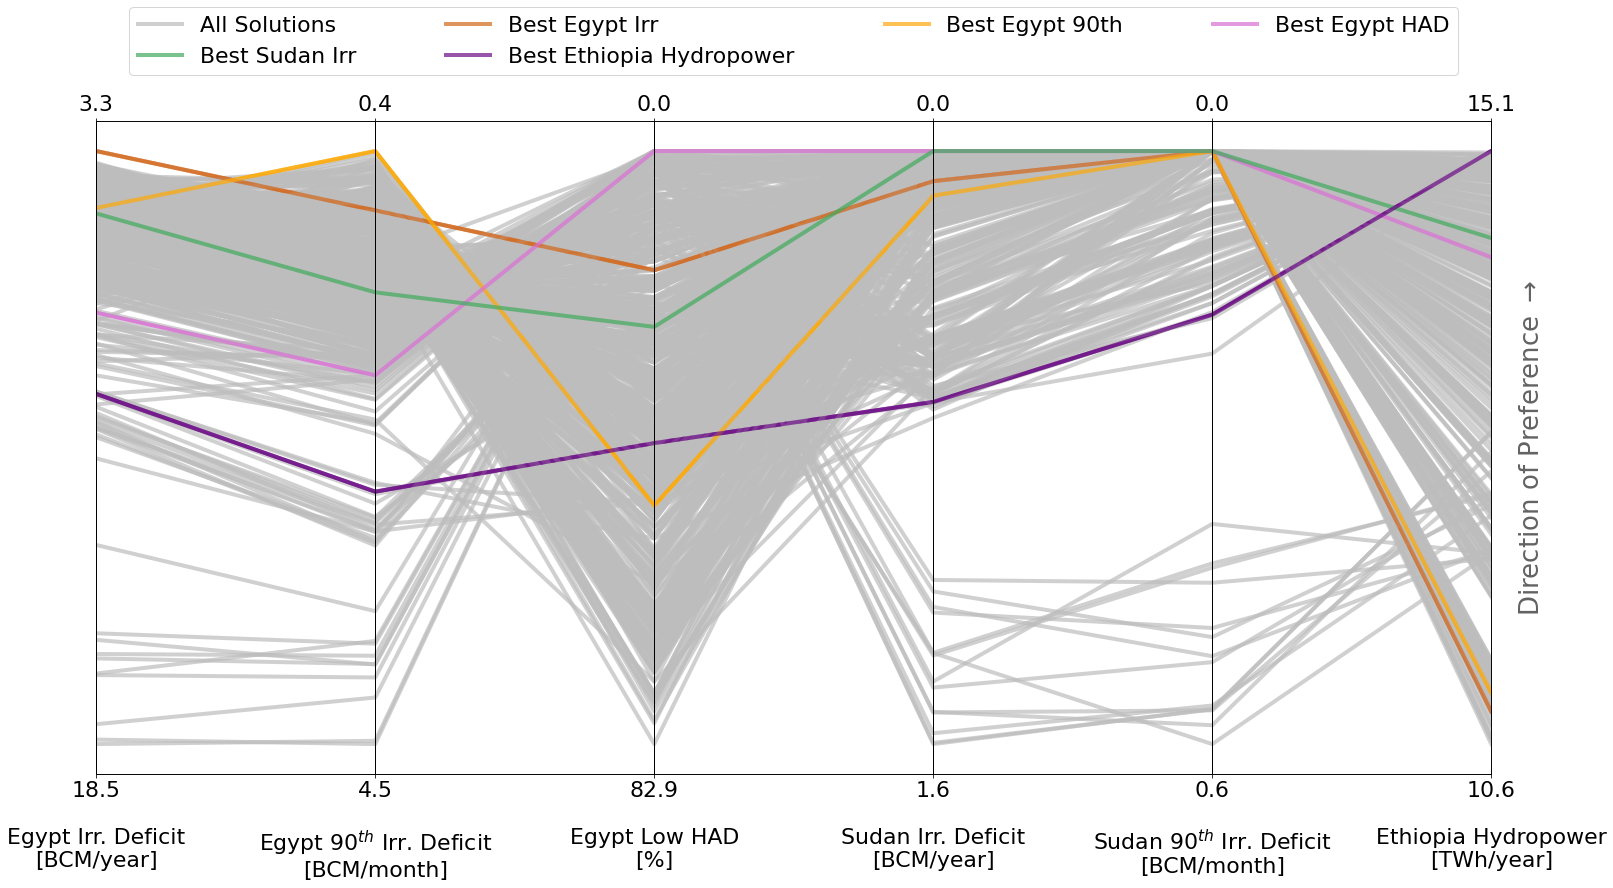

In [16]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    objectives,
    solution_indices=[483,484,96,1,475],
    solution_names=[
        "Best Egypt Irr",
        "Best Egypt 90th",
        "Best Egypt HAD",
        'Best Sudan Irr',
        "Best Ethiopia Hydropower",
    ],
)
plt.show()

In [17]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [18]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "min", "max"]
)

In [19]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    # Given a threshold percentage and normalised objectives data frame,
    # returns the indices which performs above the threshold percentage
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [20]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    # Given a threshold value [0-1] and normalised objectives data frame,
    # returns the indices which performs above the threshold value
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [21]:
find_percentile_compromise_solutions(norm_df, 48)

[106]

In [22]:
find_threshold_compromise_solutions(norm_df, 0.76)

[329]

Now, we can add two more solutions into the policy set for further analysis:

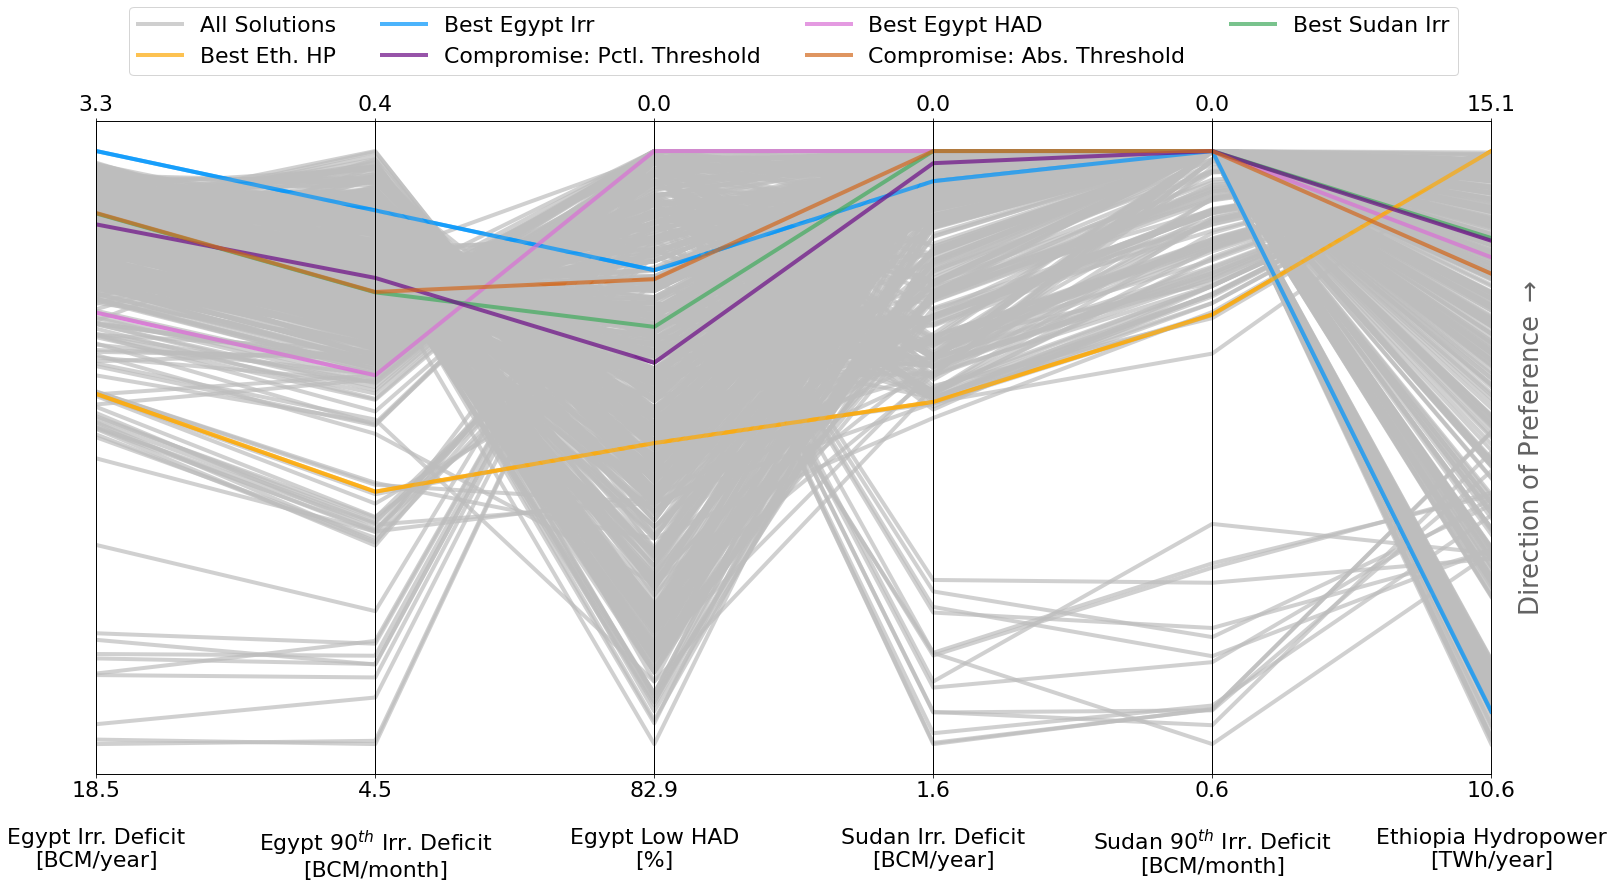

In [24]:
import importlib
from output_analysis.plotter import parallel_plots_many_policies

importlib.reload(plotter)

solution_indices = [483,96,1,475,106,329]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt HAD",
    "Best Sudan Irr",
    "Best Eth. HP",
    "Compromise: Pctl. Threshold",
    "Compromise: Abs. Threshold",
]

plotter.parallel_plots_many_policies(
    objectives,
    solution_indices=solution_indices,
    solution_names=solution_names,
)

plt.savefig("../plots/baseline_optimization/parallel_plots.svg", bbox_inches="tight")
plt.show()

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [23]:
policies_for_exploration = policies.loc[[483,484,96,1,475,106,329], :]
policies_for_exploration["name"] = [
    "best_egypt_aggregate",
    "best_egypt_90",
    "best_egypt_HAD",
    "best_sudan_irr",
    "best_ethiopia",
    "compromise_percentile",
    "compromise_threshold",
]
policies_for_exploration

v0        v1        v2        v3        v4        v5        v6  \
483  0.349191  0.086046  0.478351  0.309350 -0.587293  0.422957 -0.360149   
484  0.354337  0.138460  0.417910  0.337089 -0.585068  0.436910 -0.559059   
96   0.054746  0.396289  0.420694  0.222847 -0.749718  0.453206 -0.322691   
1    0.005551  0.114852  0.416813  0.215447 -0.673022  0.456056 -0.329024   
475  0.001324  0.093489  0.420729  0.319092 -0.826907  0.731986 -0.315883   
106  0.000513  0.114183  0.379610  0.222861 -0.722627  0.452649  0.260217   
329  0.022752  0.114852  0.381281  0.207848 -0.750762  0.456056 -0.377674   

           v7        v8        v9  ...      v155      v156      v157  \
483  0.244115 -0.150116  0.421363  ...  0.801727 -0.365245  0.122869   
484  0.817862 -0.230990  0.385671  ...  0.284131  0.559281  0.490532   
96   0.189647 -0.746092  0.730377  ...  0.264012  0.602520  0.041722   
1    0.234759 -0.018857  0.743872  ...  0.268615  0.880326  0.538180   
475  0.246017  0.455435  0.729038  ...  0.292108 -0.184765  0.539994   
106  0.235133 -0.412399  0.729811  ...  0.268289  0.613512  0.535220   
329  0.229767 -0.036241  0.729675  ...  0.268615  0.880326  0.545296   

         v158      v159      v160      v161      v162      v163  \
483  0.795370  0.148788  0.378289  0.068925  0.513462  0.382493   
484  0.715876  0.812838  0.373498  0.274527  0.286374  0.374798   
96  -0.542675  0.392099  0.360197  0.096884  0.281387  0.373687   
1    0.926470  0.776713  0.359905  0.096117  0.525507  0.365050   
475  0.618664  0.366933  0.388232  0.292178  0.318311  0.766348   
106  0.730383  0.756468  0.362013  0.939978  0.515373  0.375135   
329  0.926470  0.142790  0.359905  0.009373  0.518357  0.365144   

                      name  
483   best_egypt_aggregate  
484          best_egypt_90  
96          best_egypt_HAD  
1           best_sudan_irr  
475          best_ethiopia  
106  compromise_percentile  
329   compromise_threshold  

[7 rows x 165 columns]

In [24]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

In [25]:
# names_display = [
#     "Egypt Irr. Deficit",
#     "Egypt 90$^{th}$ Irr. Deficit",
#     "Egypt Low HAD",
#     "Sudan Irr. Deficit",
#     "Sudan 90$^{th}$ Irr. Deficit",
#     "Ethiopia Hydropower",
# ]
# norm_df_names = norm_df.copy()
# norm_df_names.columns = names_display
# sns.pairplot(
#     norm_df_names,
#     corner=True,
#     diag_kind="kde",
#     kind="reg",
#     plot_kws={"line_kws": {"color": "red"}},
# )
# plt.show()

## System Behaviour under Selected Policies

Let's first create and run a separate model under every one of the policies and store them in a dict. Then, bring the plotter class for visuals.

In [27]:
solution_indices = [483,484,96,1,475,106,329]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Sudan Irr",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]
running_models = dict()
for i, sol_name in tqdm(enumerate(solution_names)):
    new_model = ModelNile()
    new_model = generate_input_data(new_model)
    new_model.evaluate(solutions[i])
    running_models[sol_name] = new_model

0it [00:00, ?it/s]

/Users/maanavjhatakia/Documents/Thesis.nosync/master-thesis-project/nile_EMODPS_framework/output_analysis/settings_file_Nile.xlsx


OSError: /Users/maanavjhatakia/Documents/Thesis.nosync/master-thesis-project/nile_EMODPS_framework/output_analysis/IrrDemandUSSennar.txt not found.

----------------
Best Egypt Irr
----------------


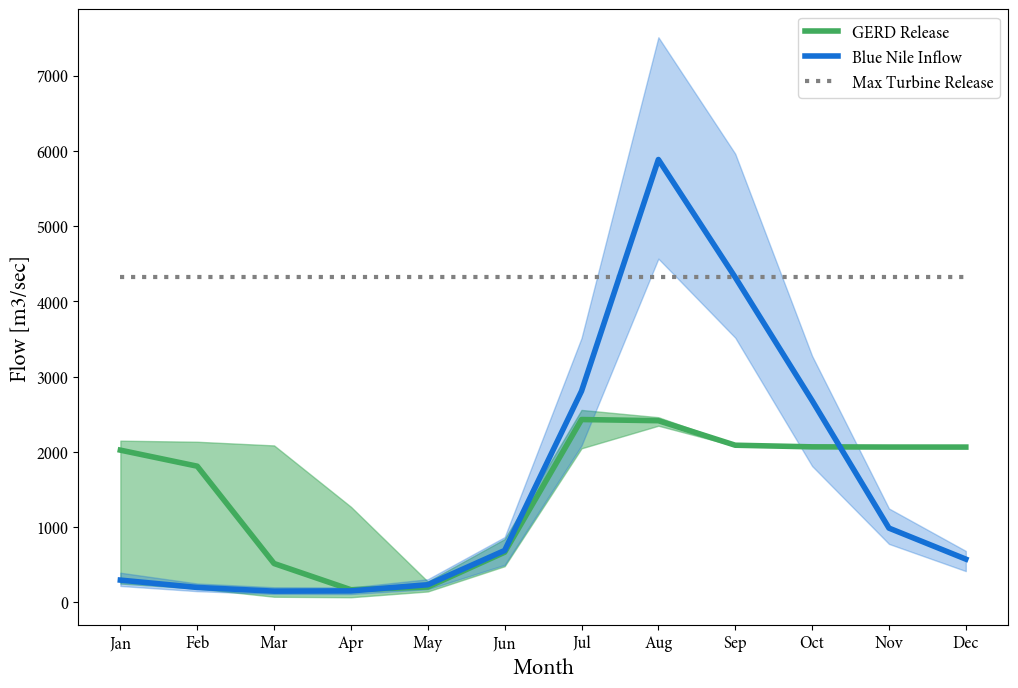

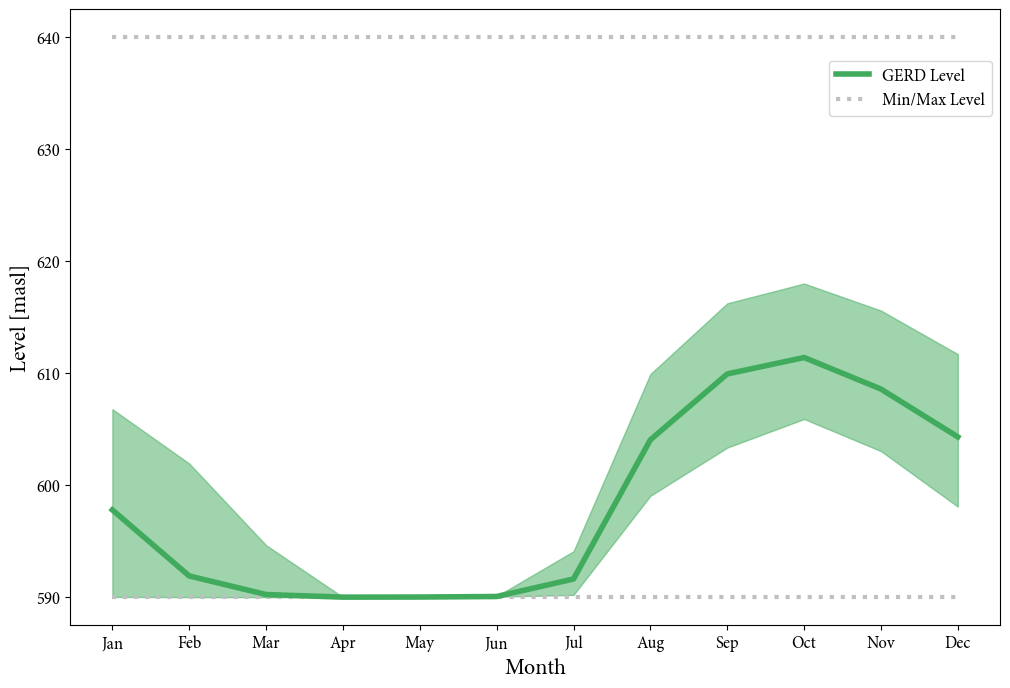

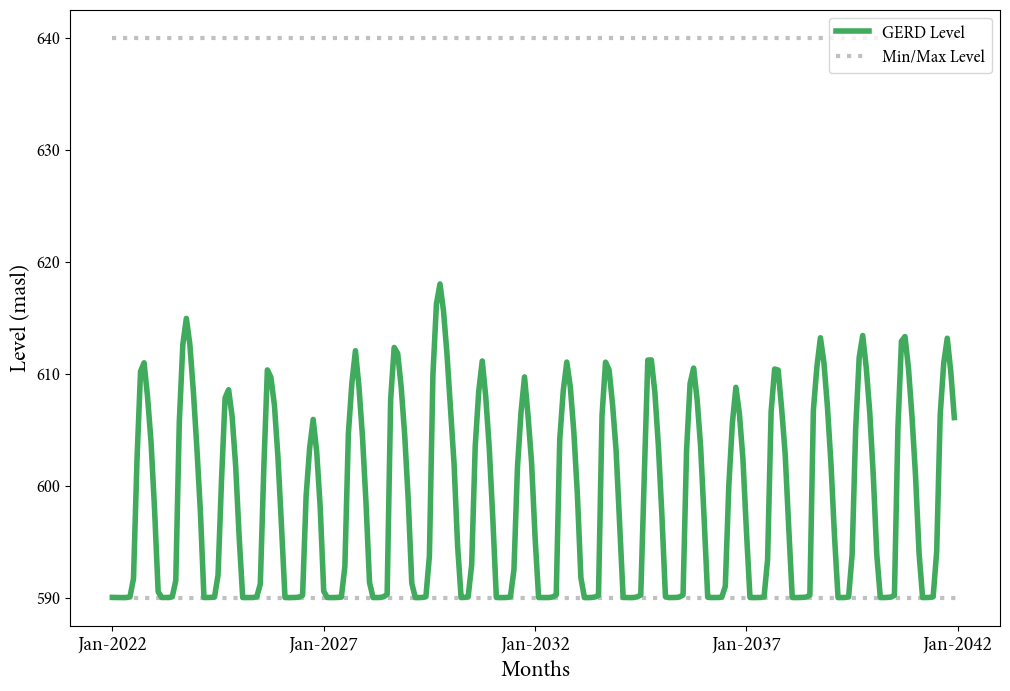

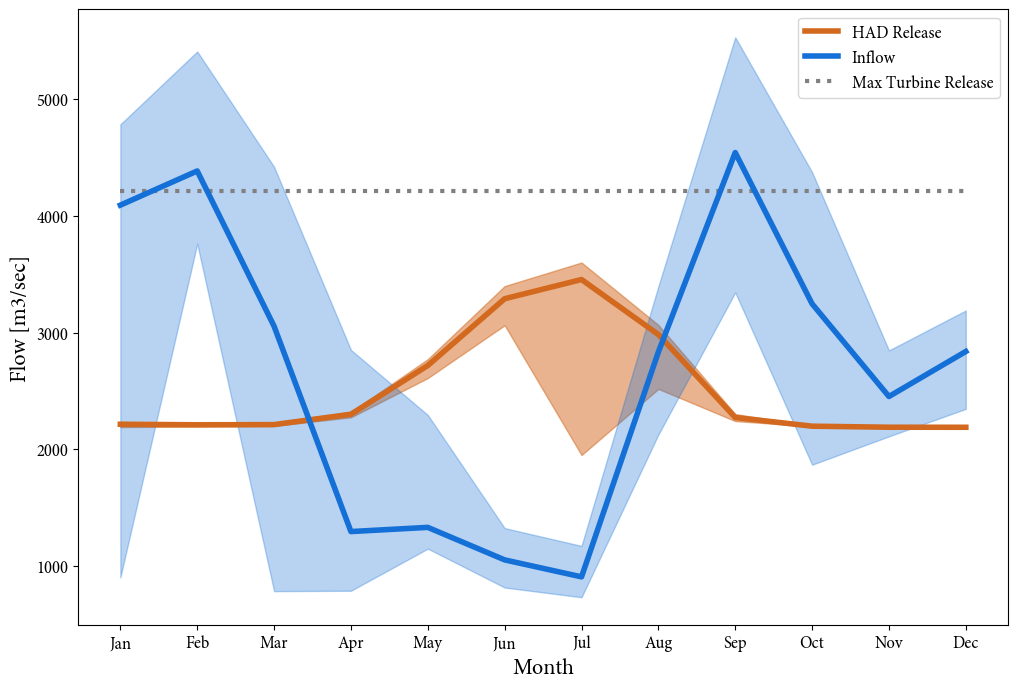

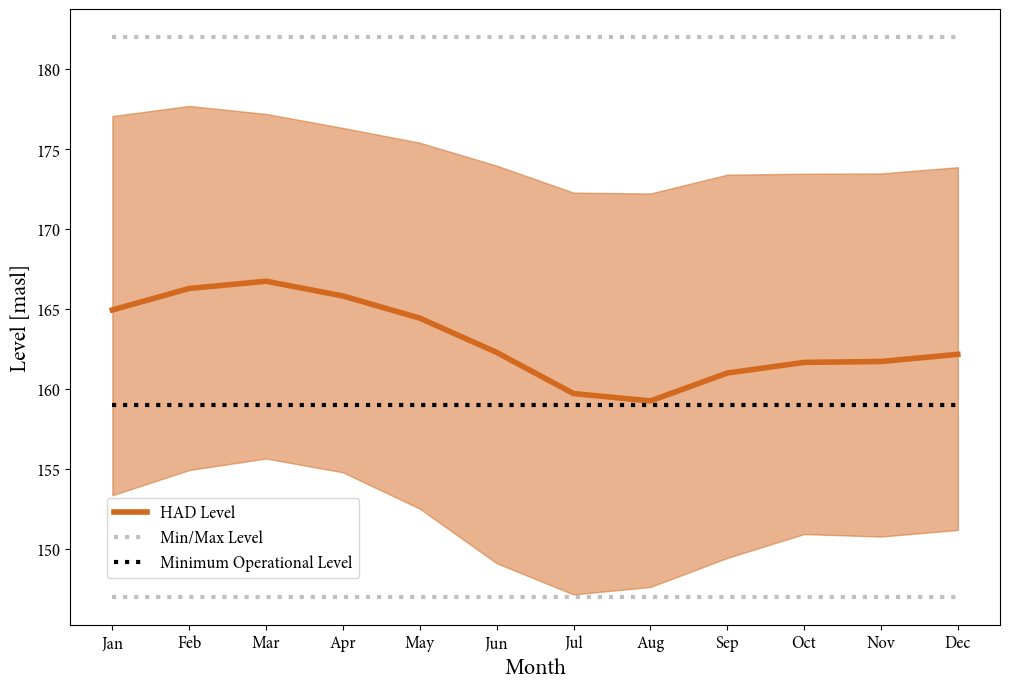

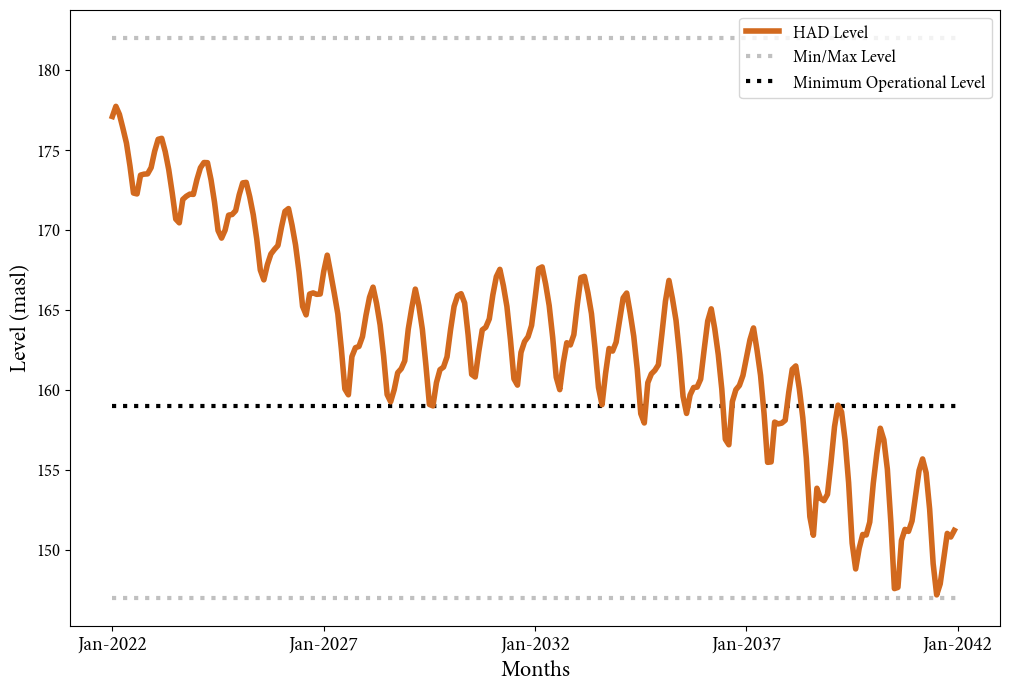

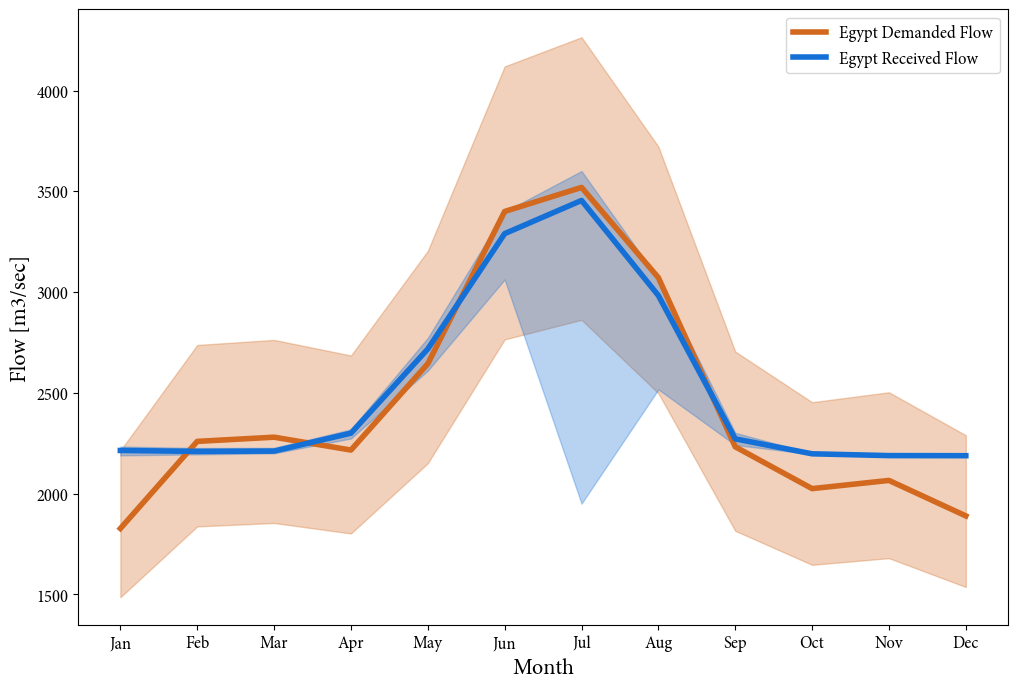

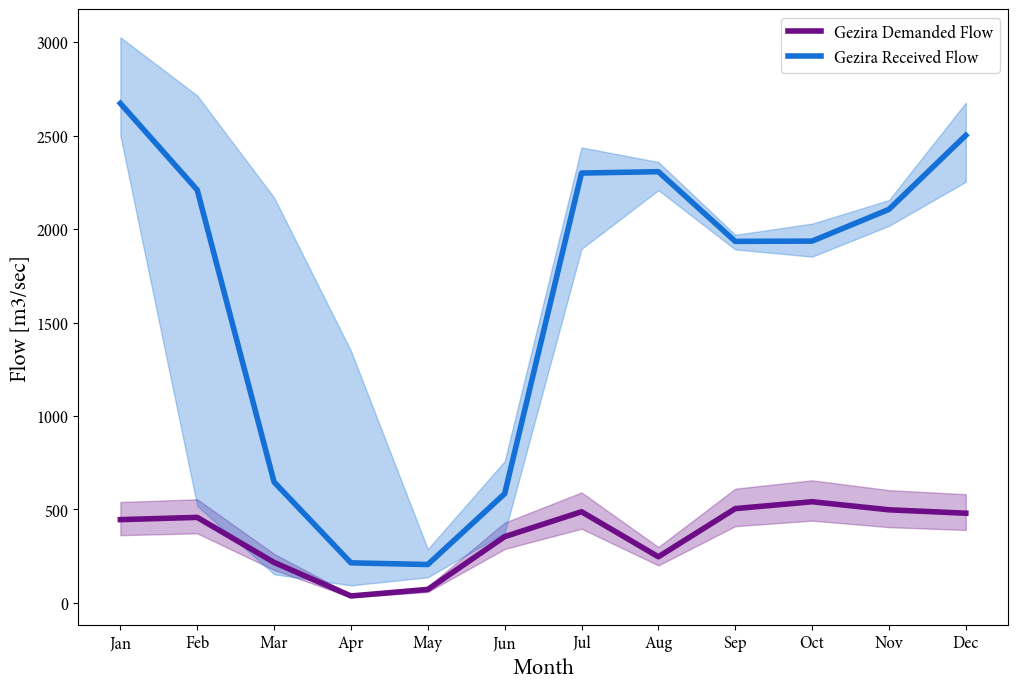

----------------
Best Egypt 90$^{th}$
----------------


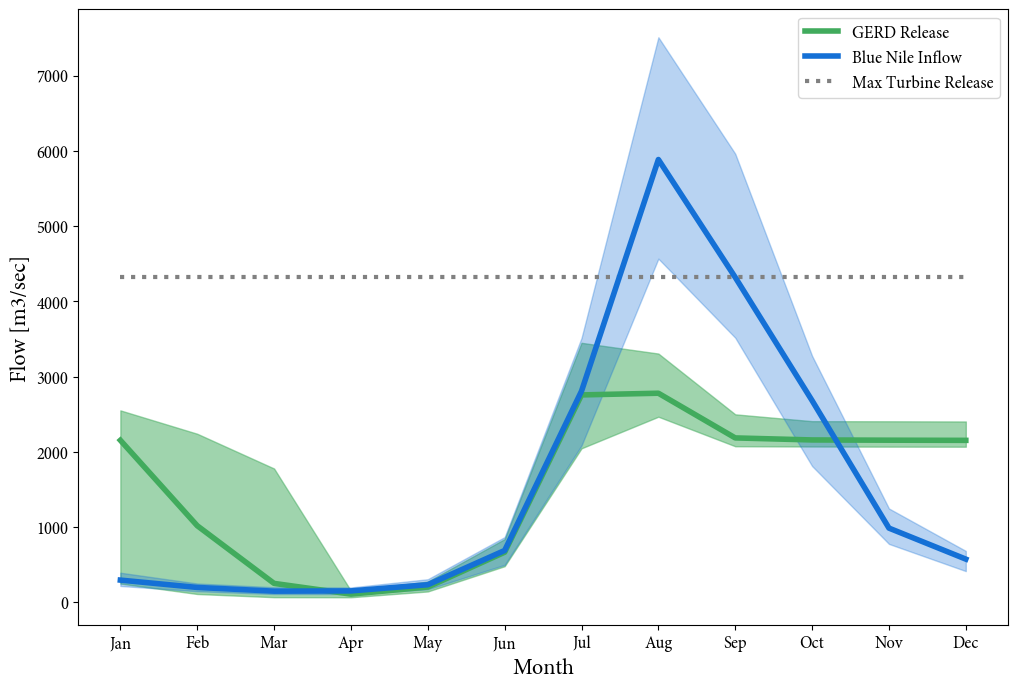

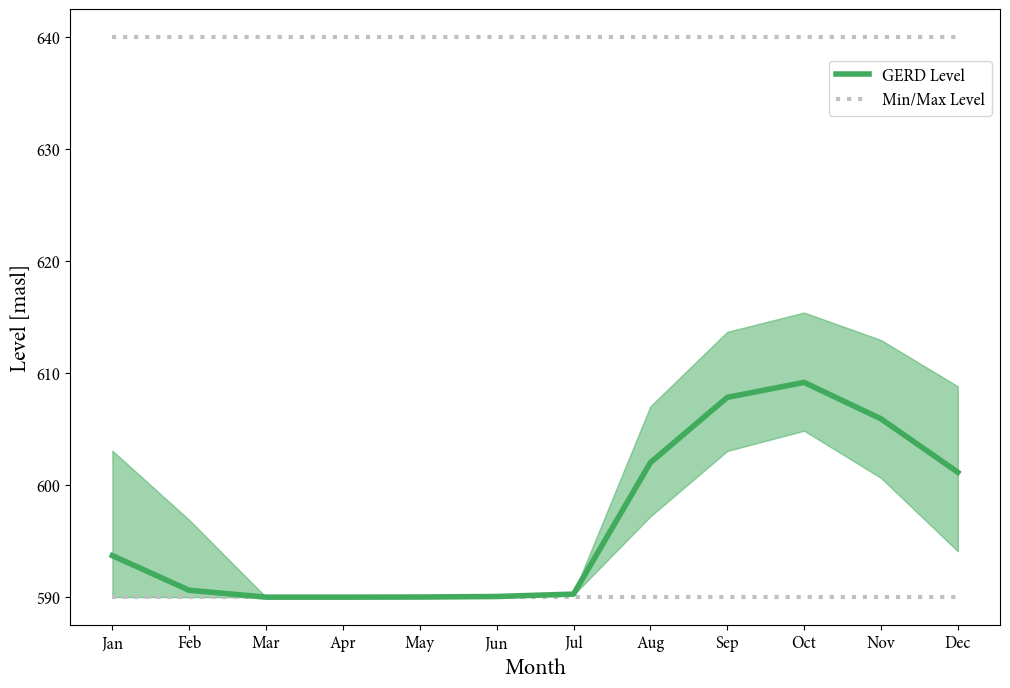

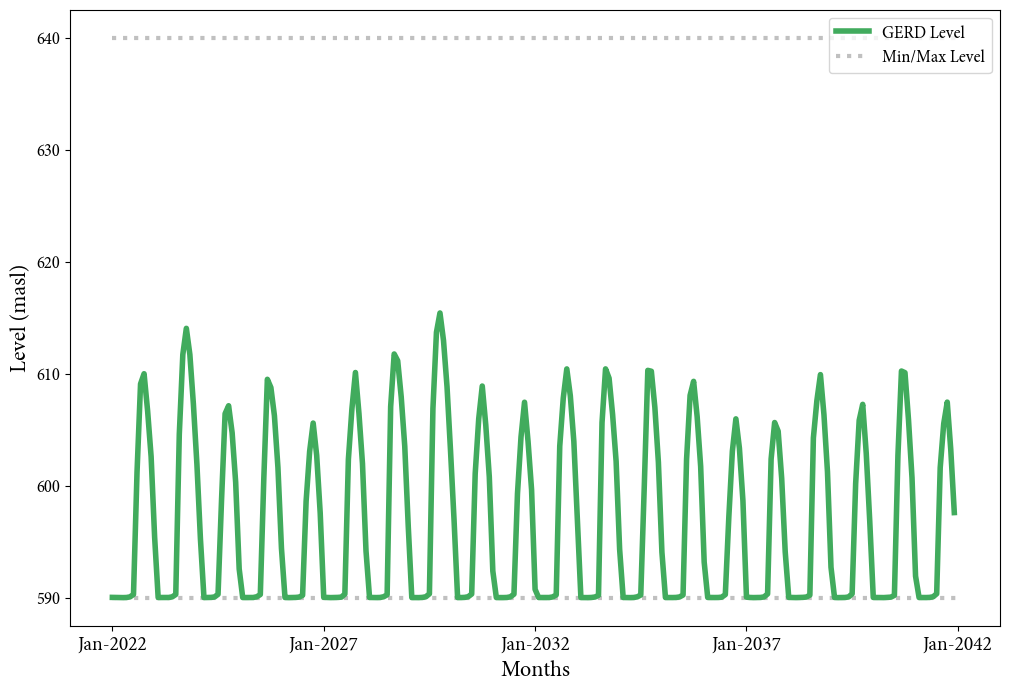

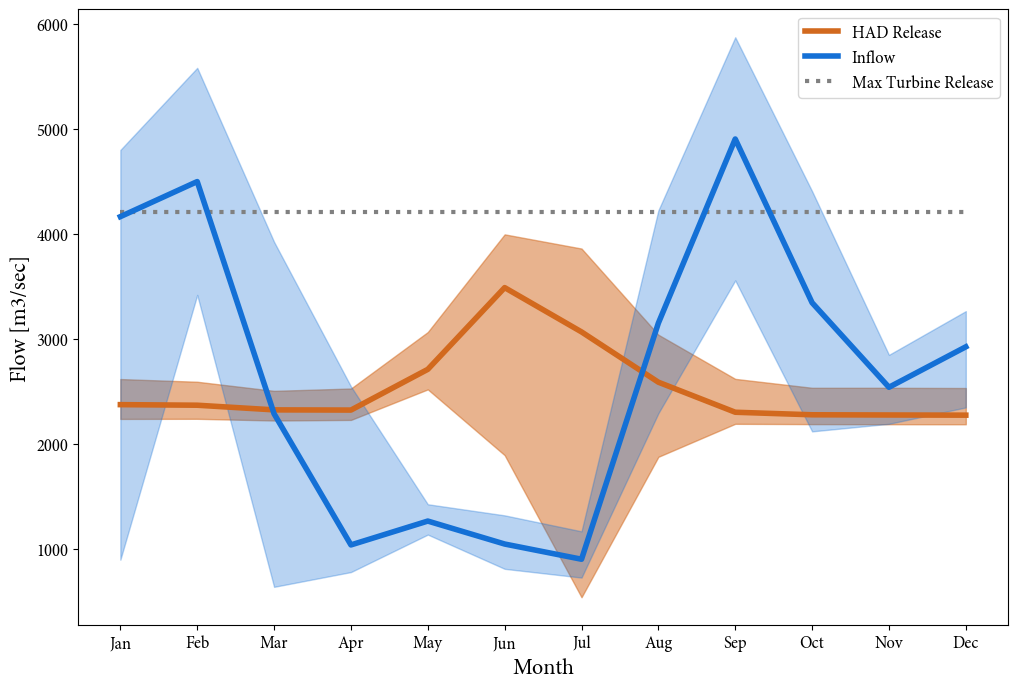

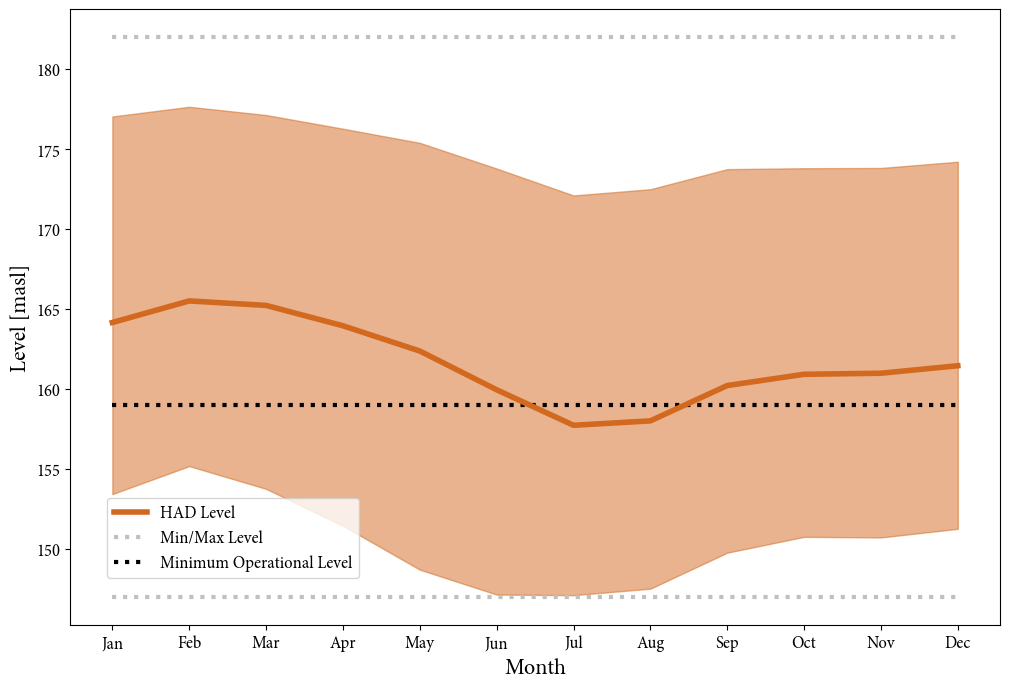

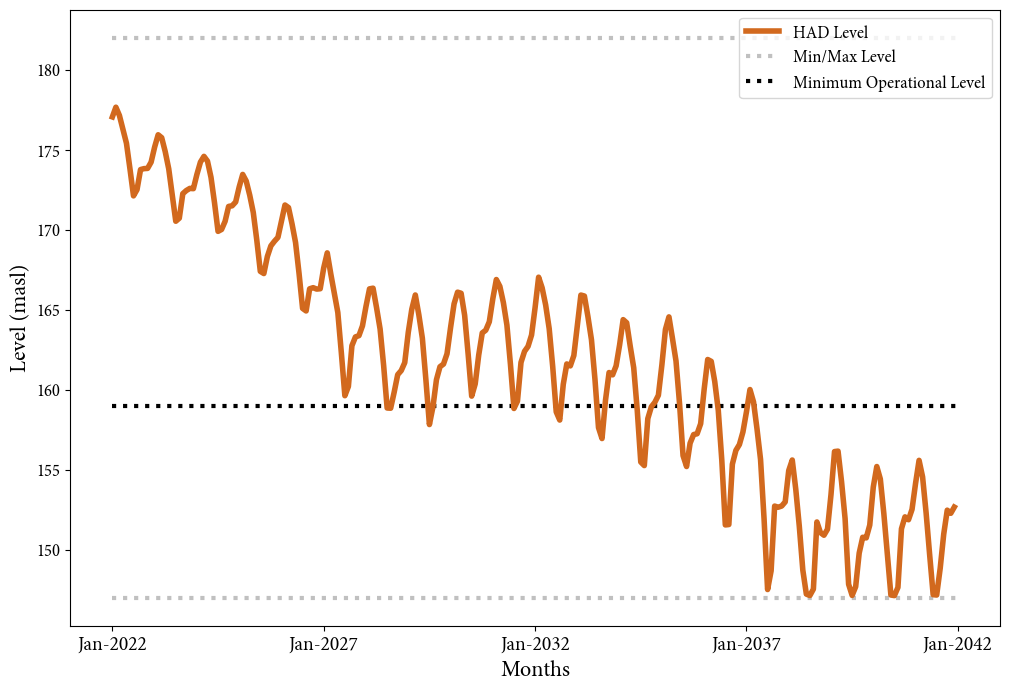

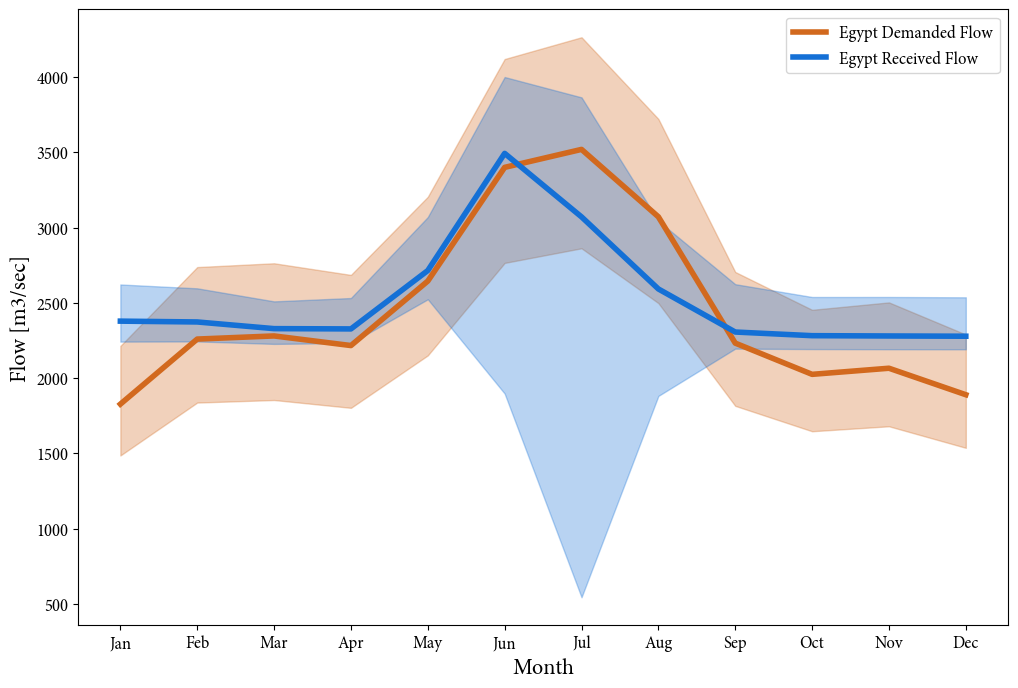

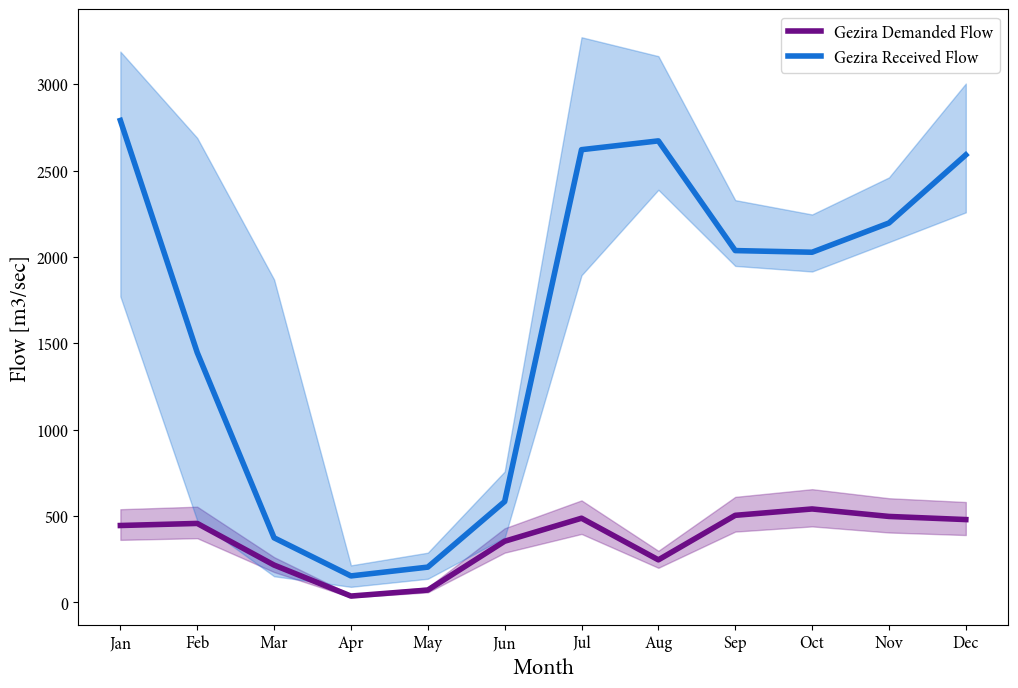

----------------
Best Egypt HAD
----------------


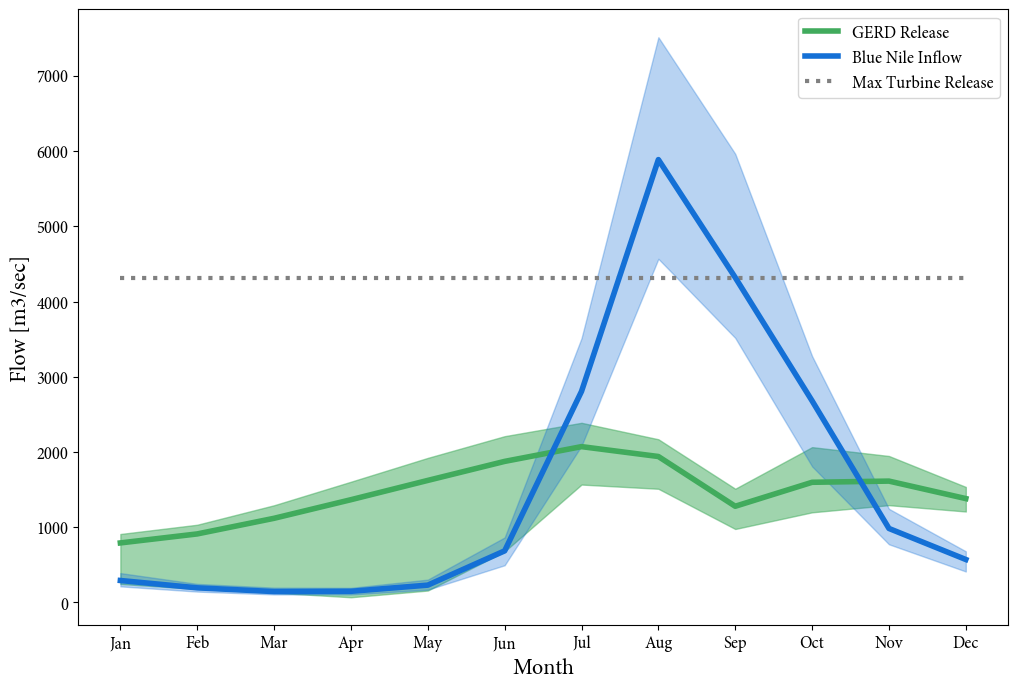

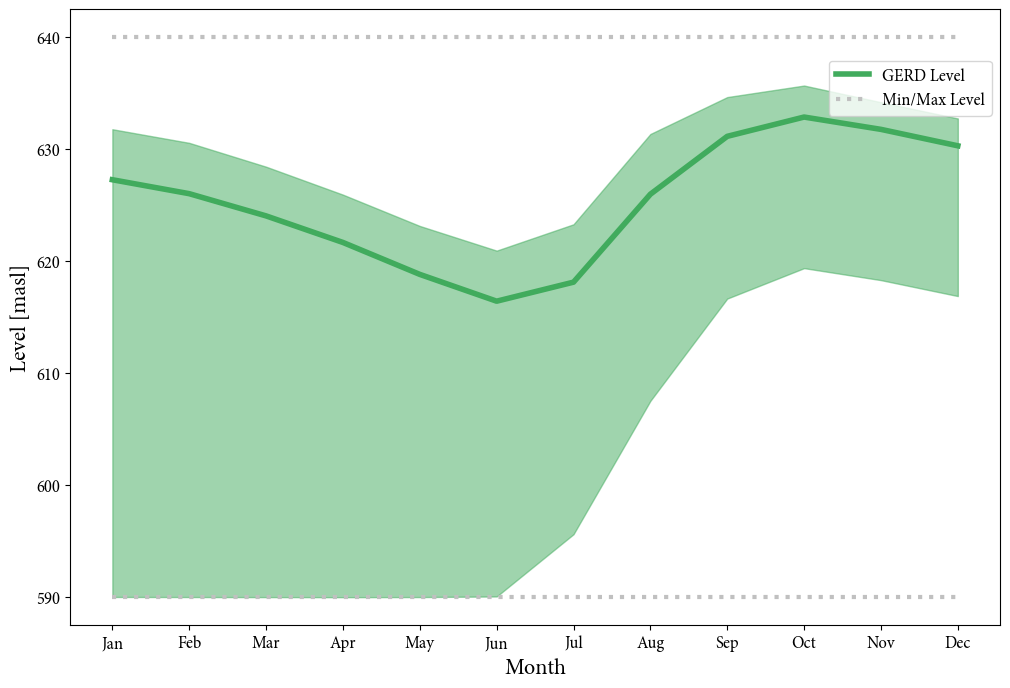

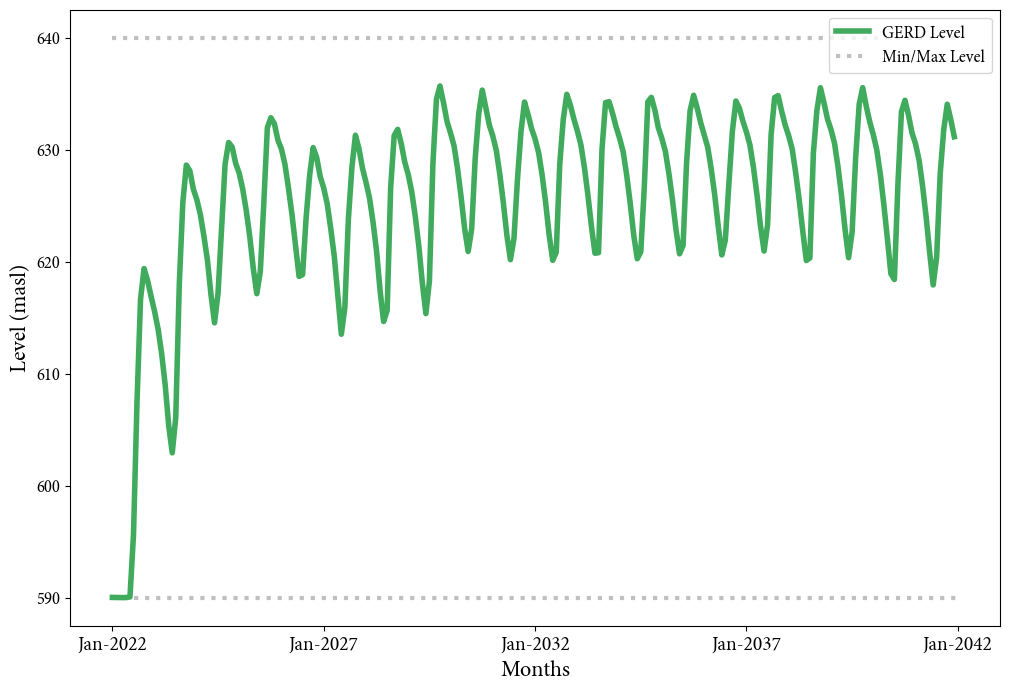

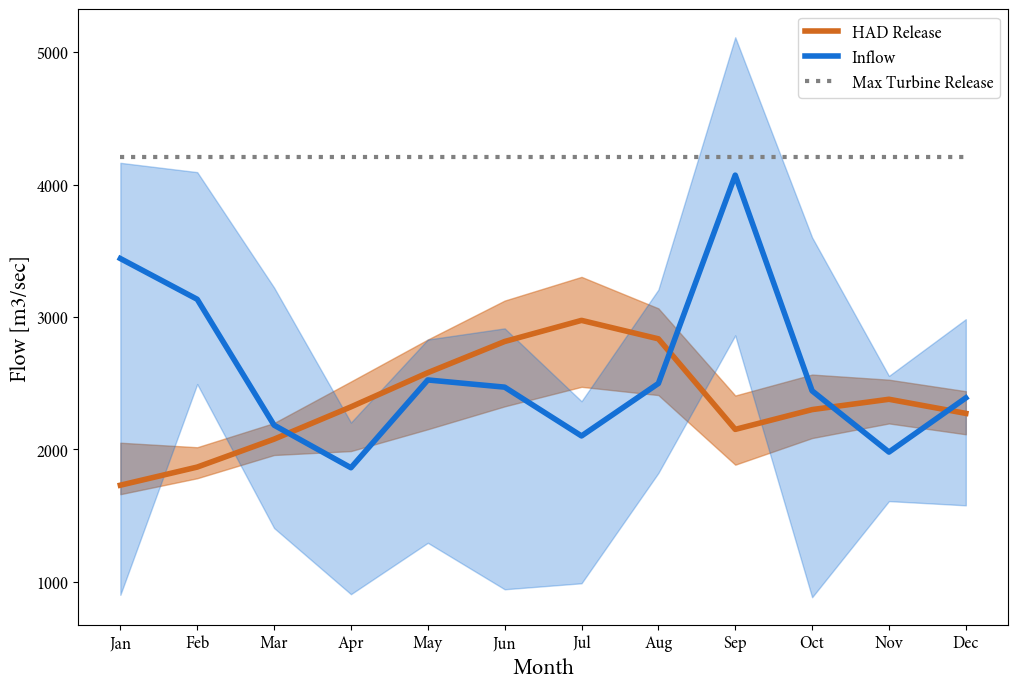

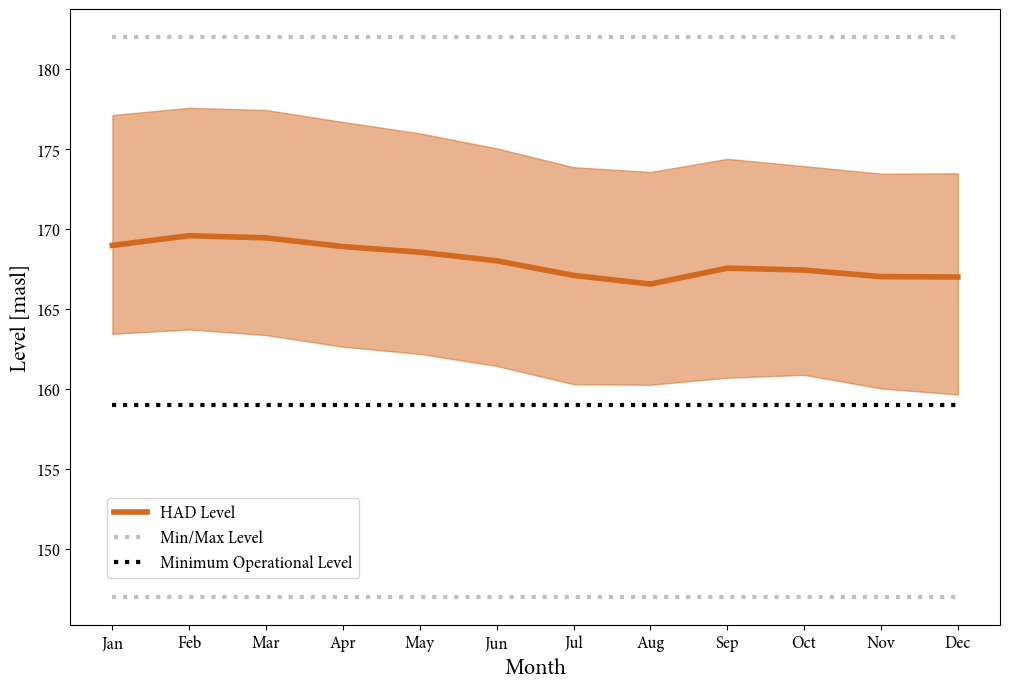

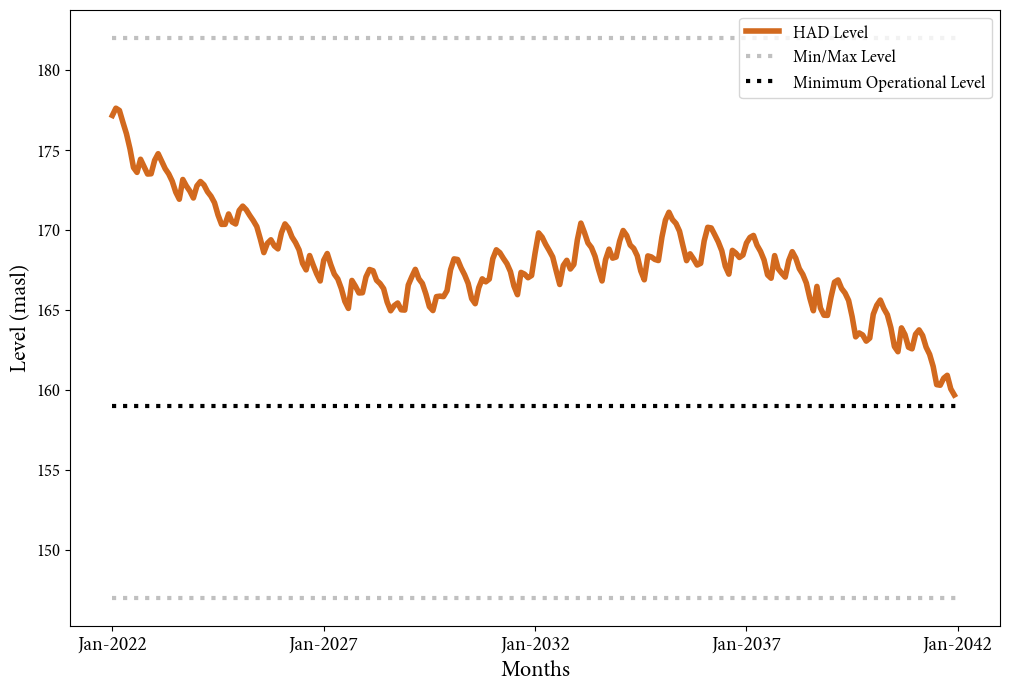

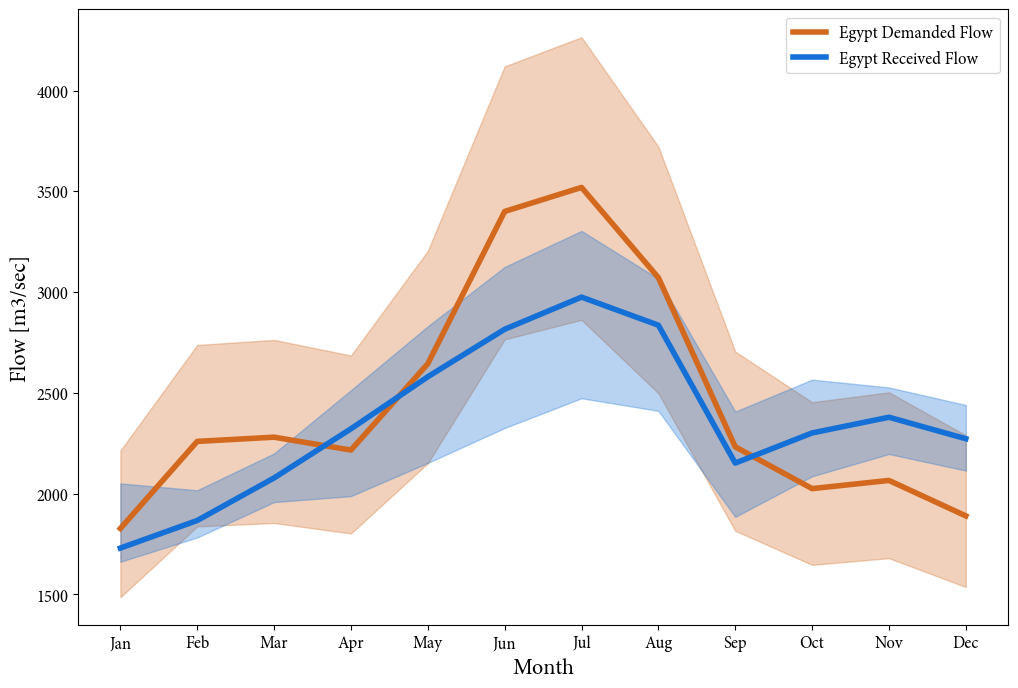

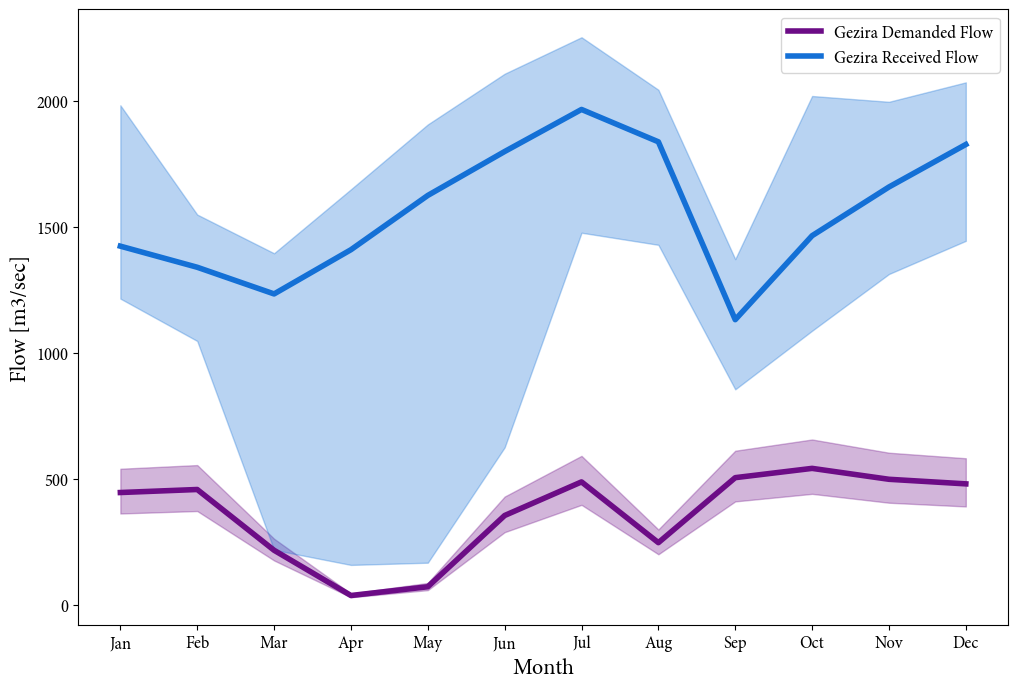

----------------
Best Ethiopia Hydropower
----------------


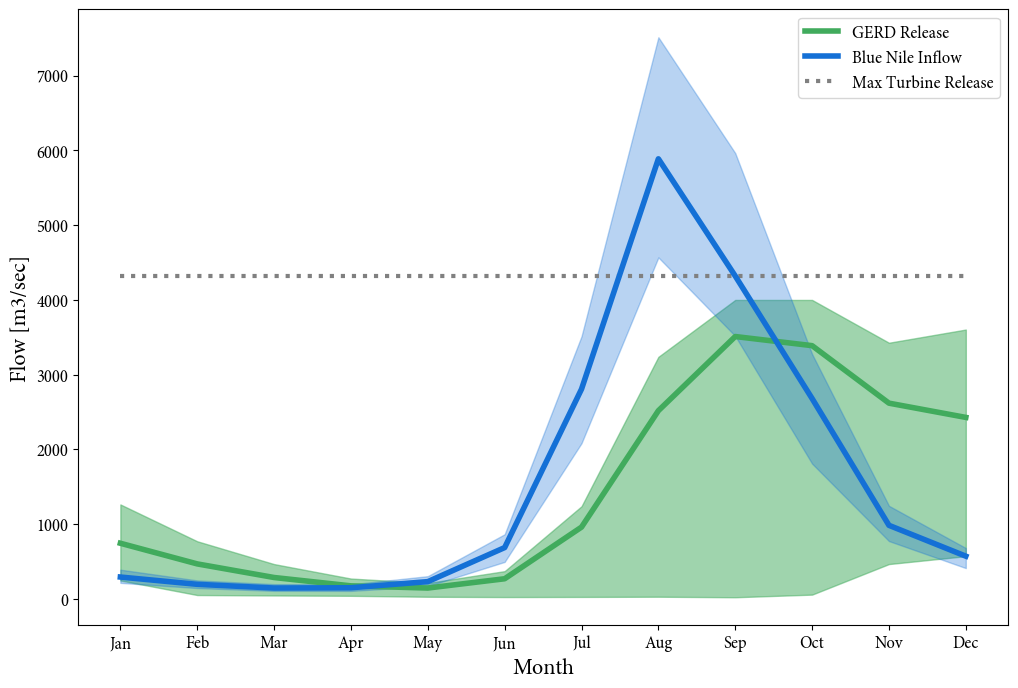

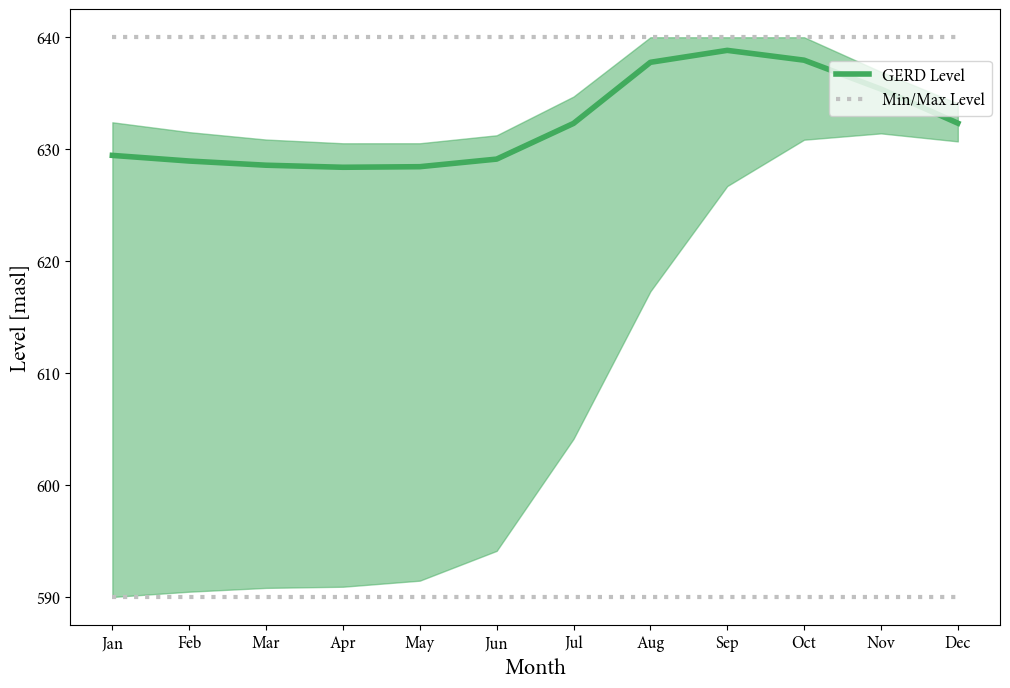

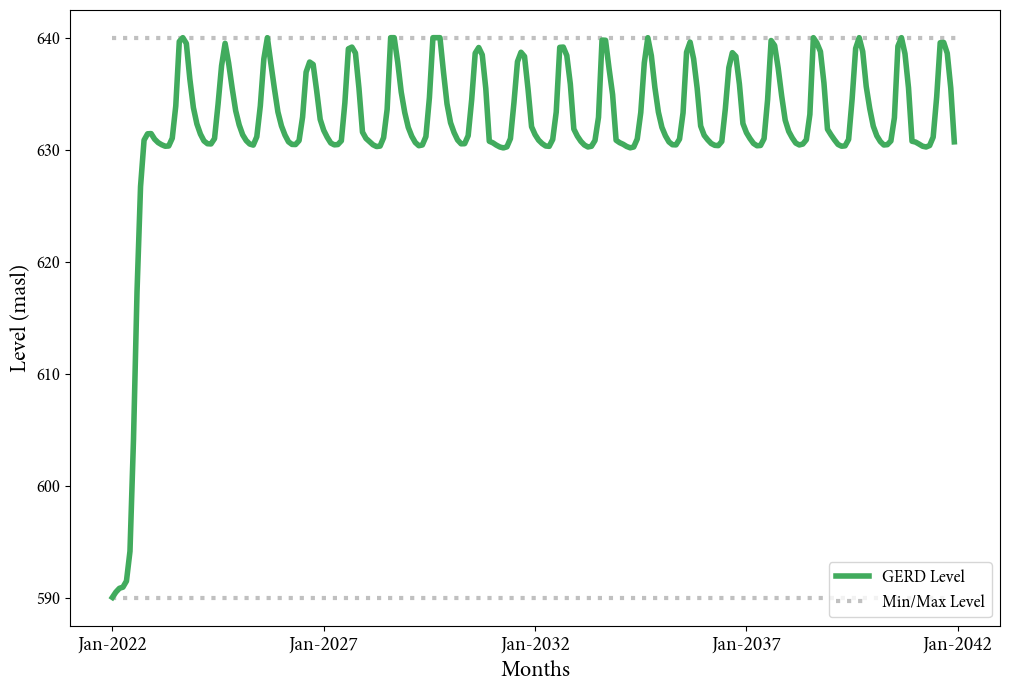

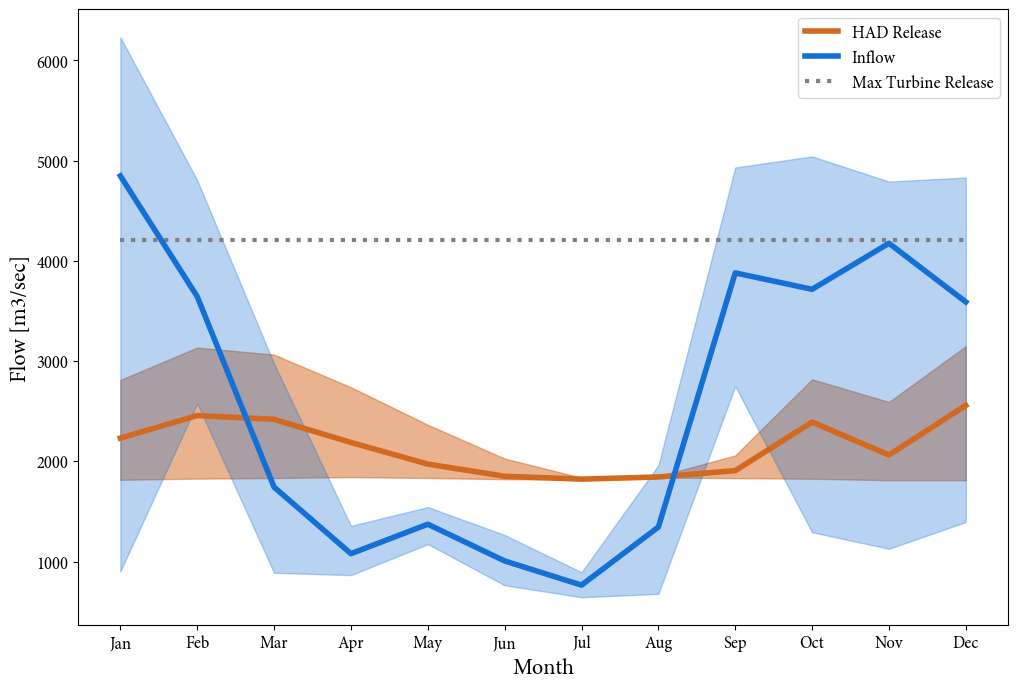

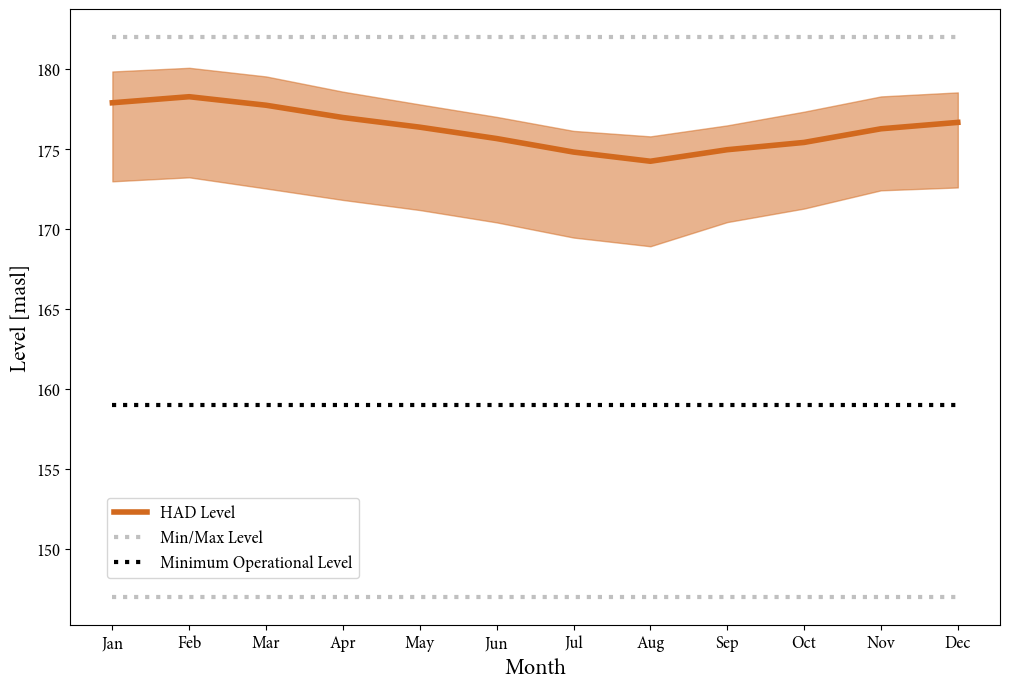

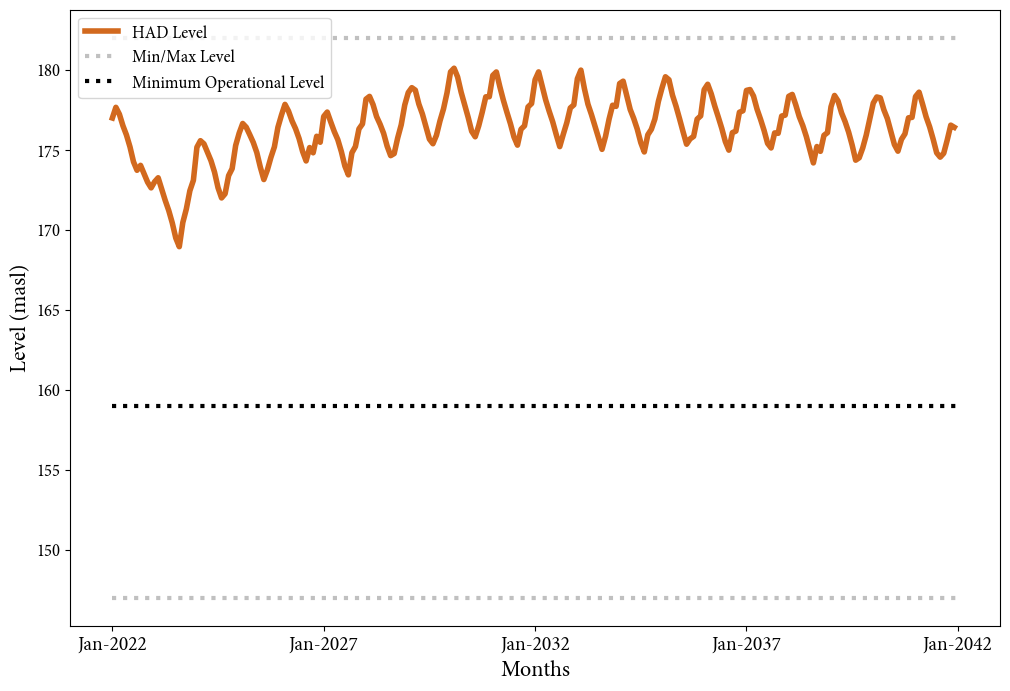

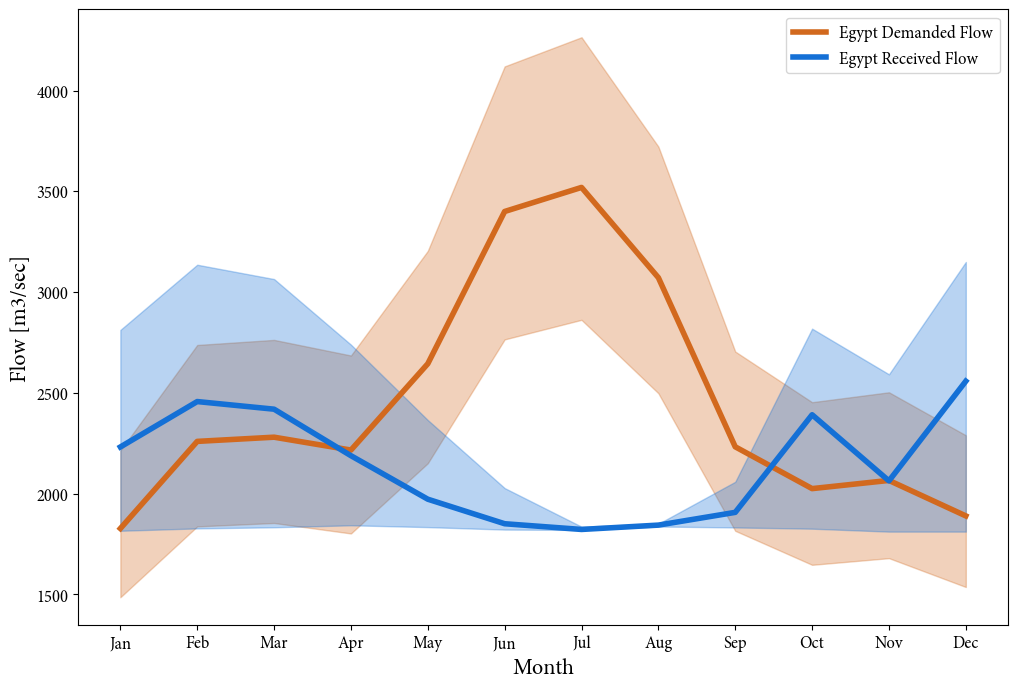

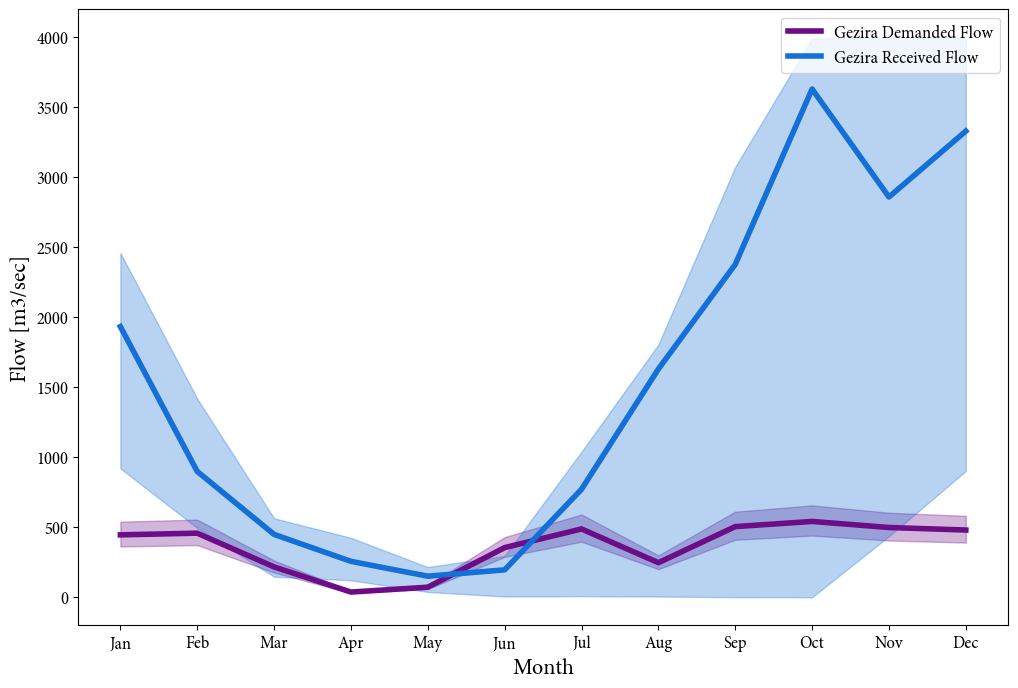

----------------
Compromise: Percentile Threshold
----------------


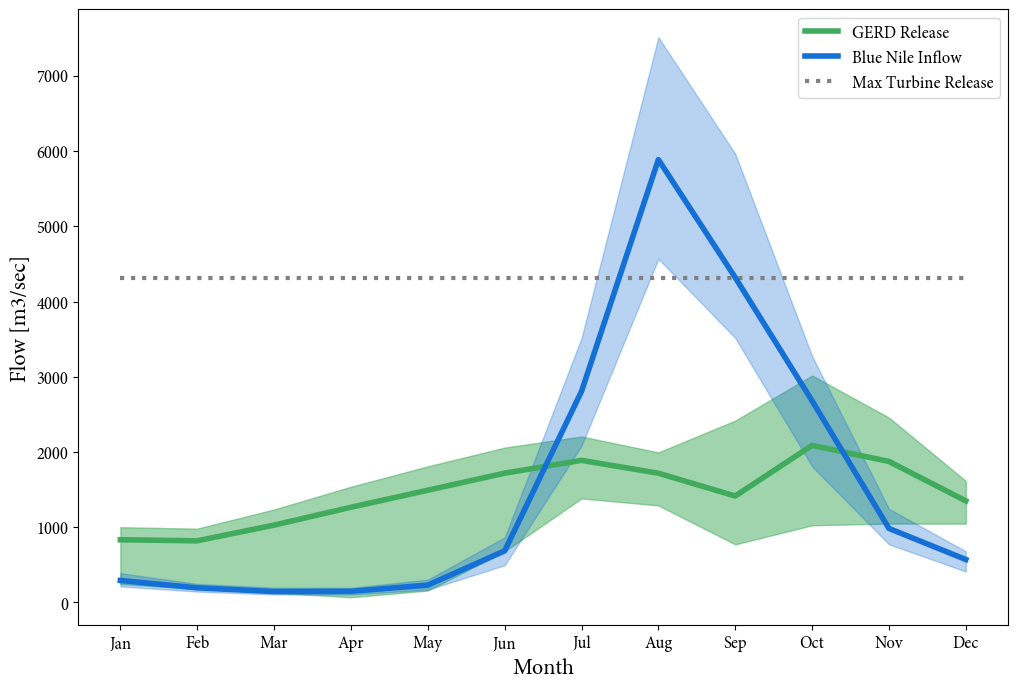

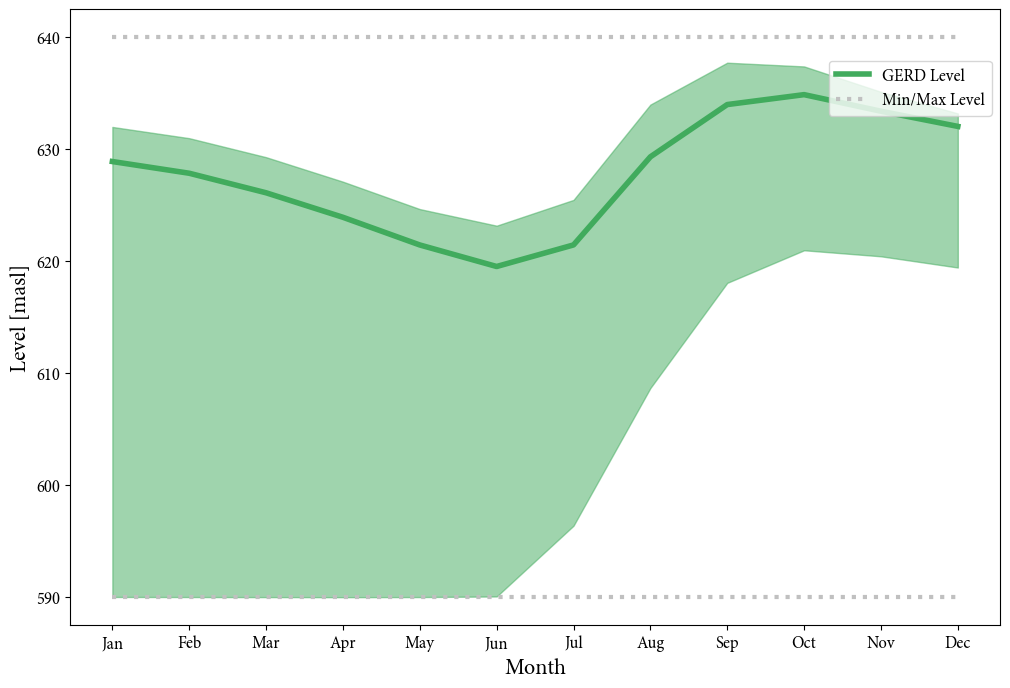

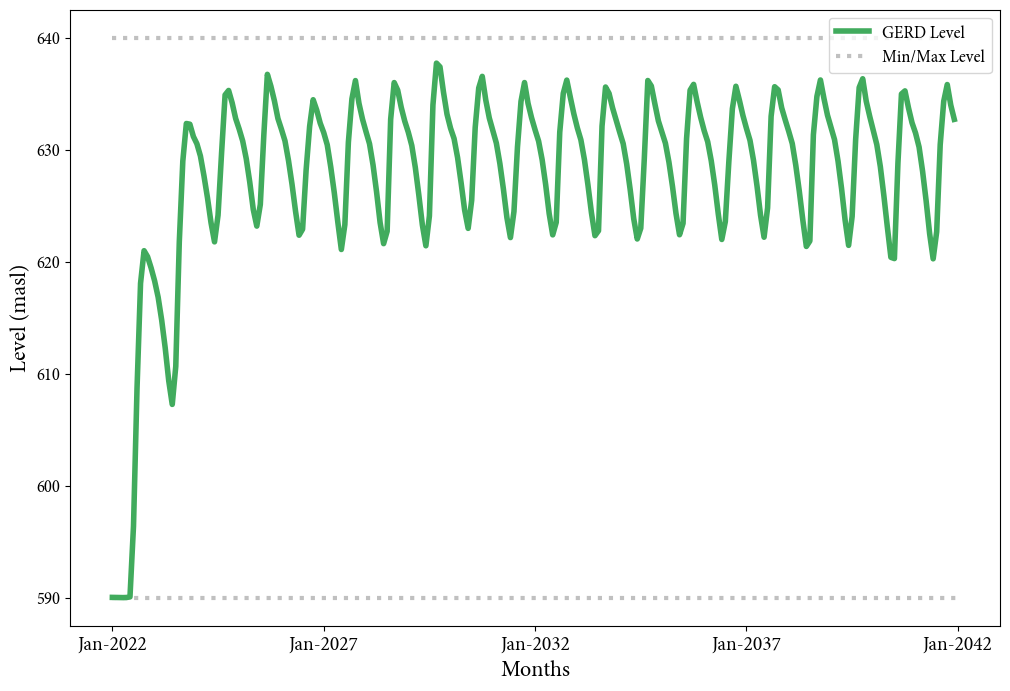

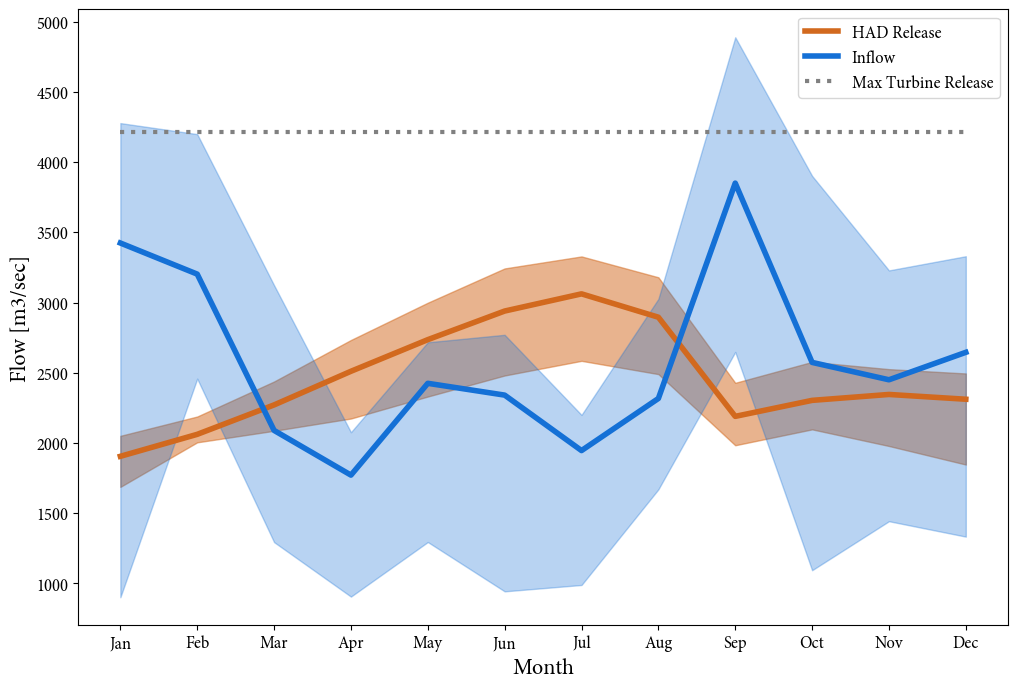

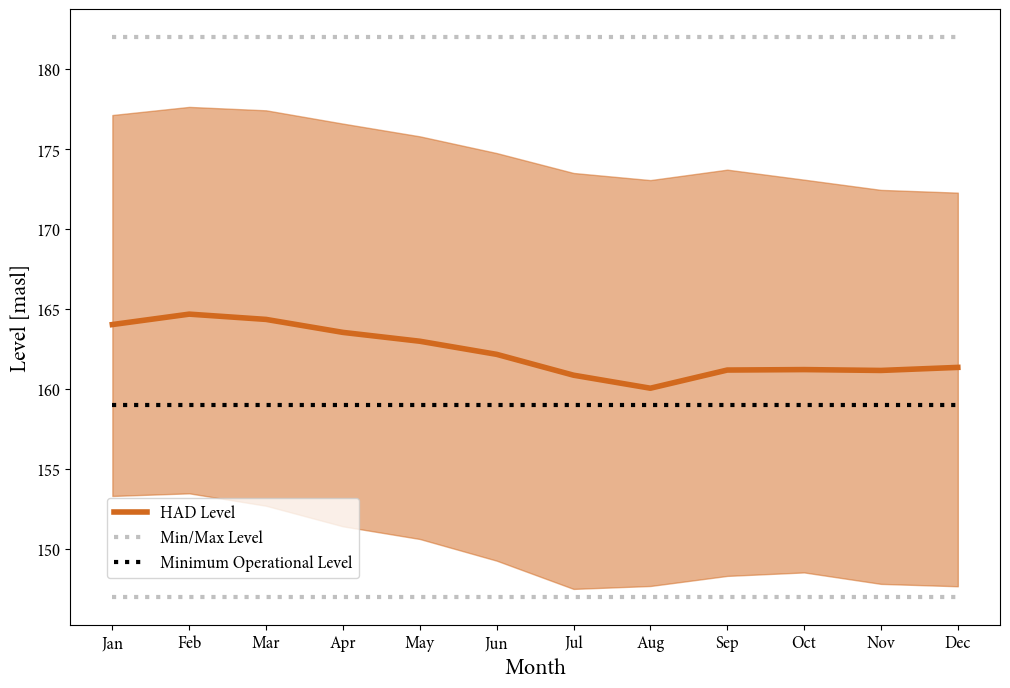

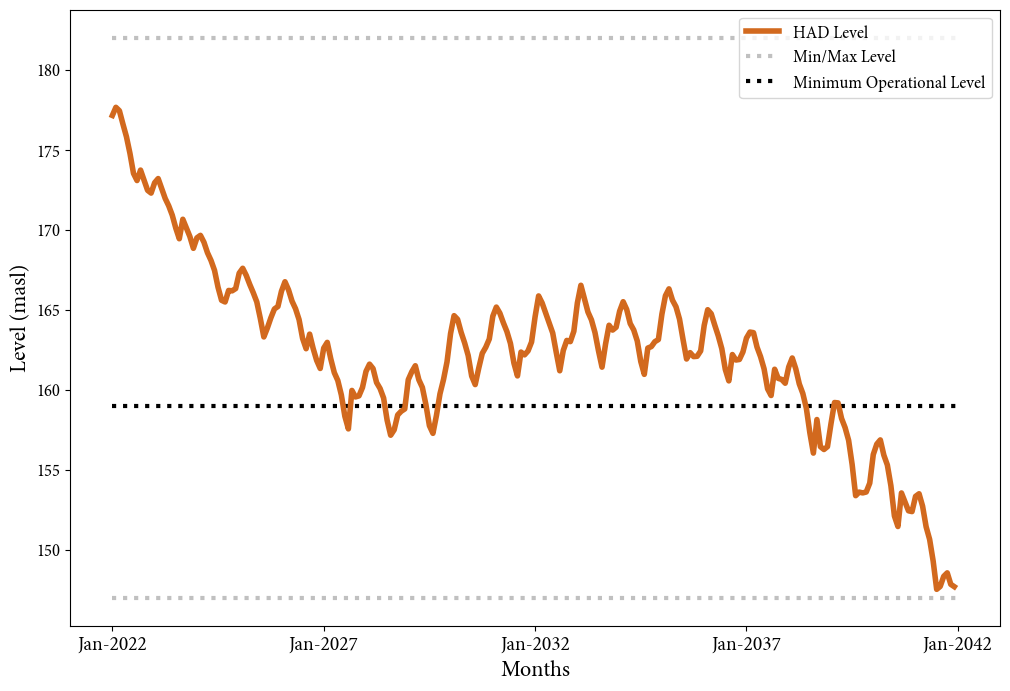

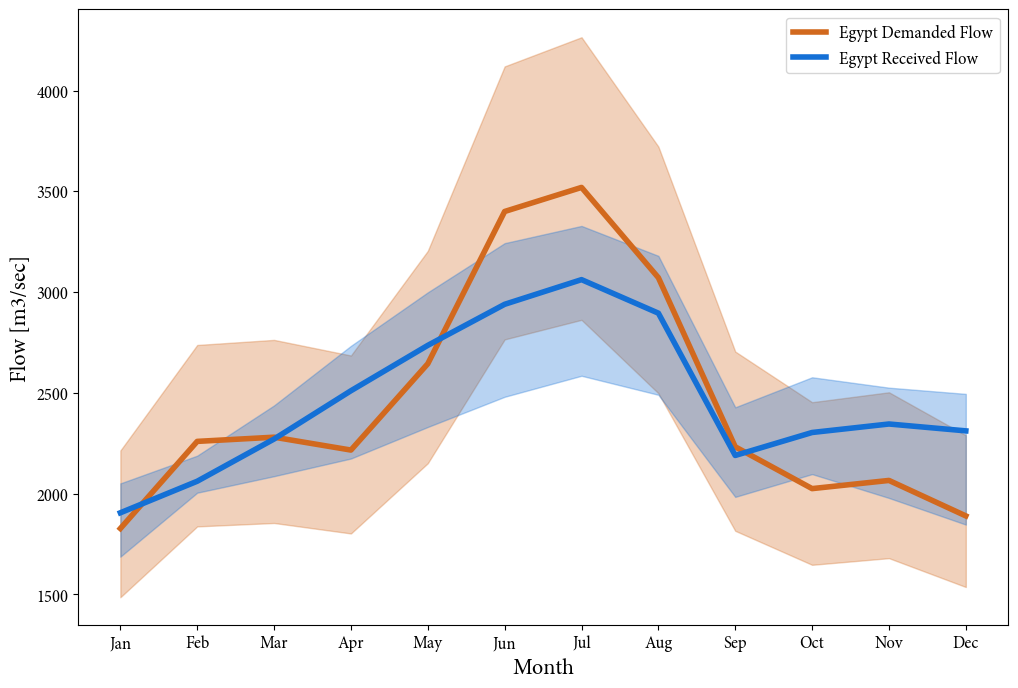

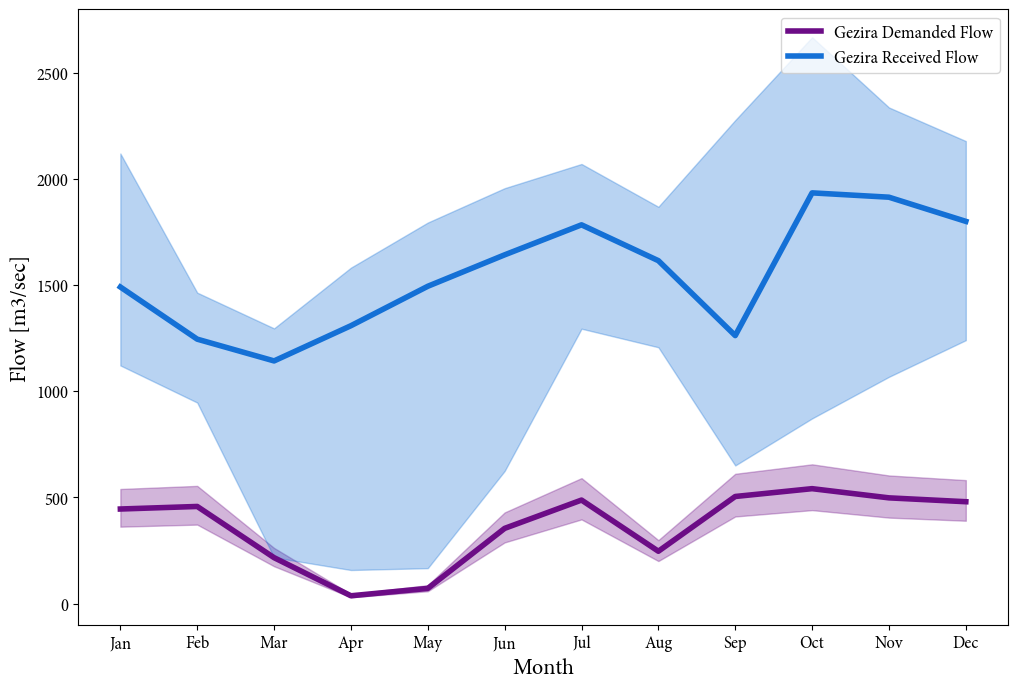

----------------
Compromise: Absolute Threshold
----------------


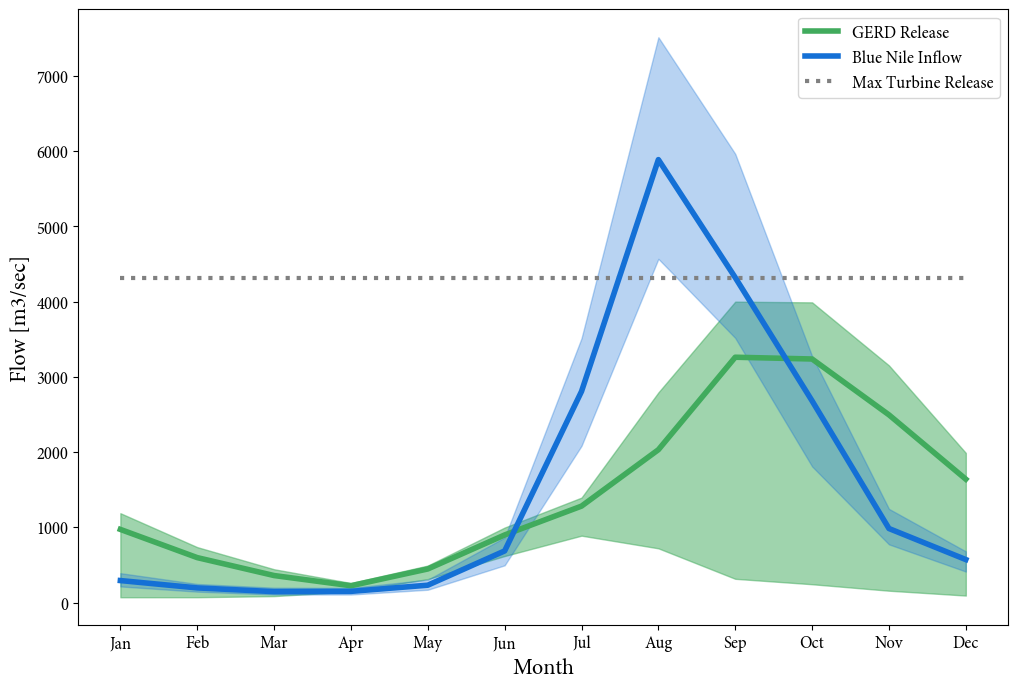

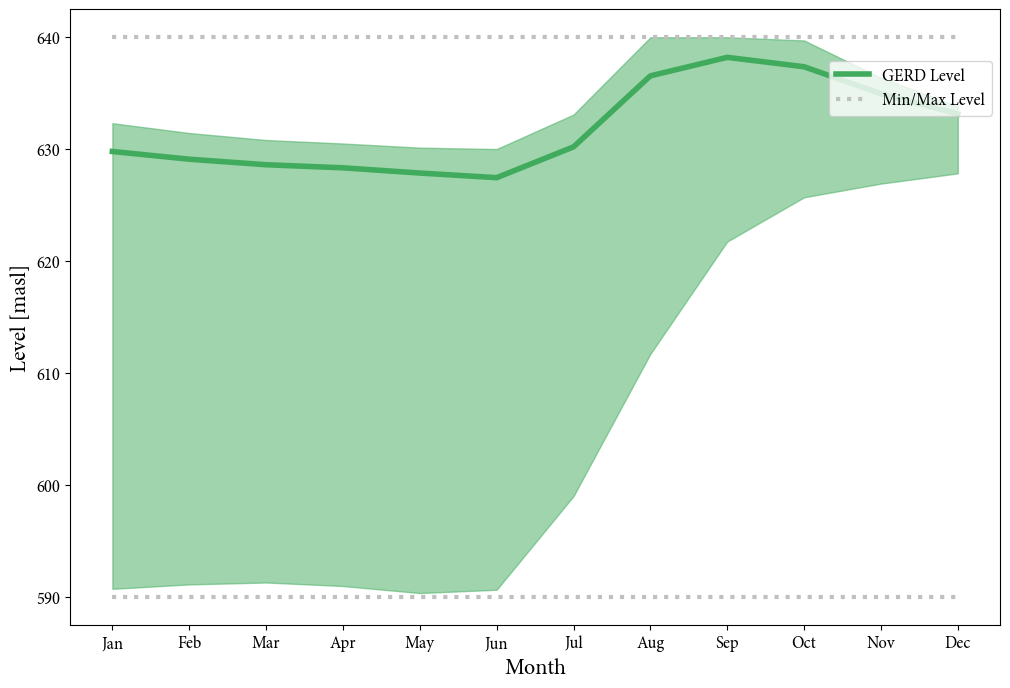

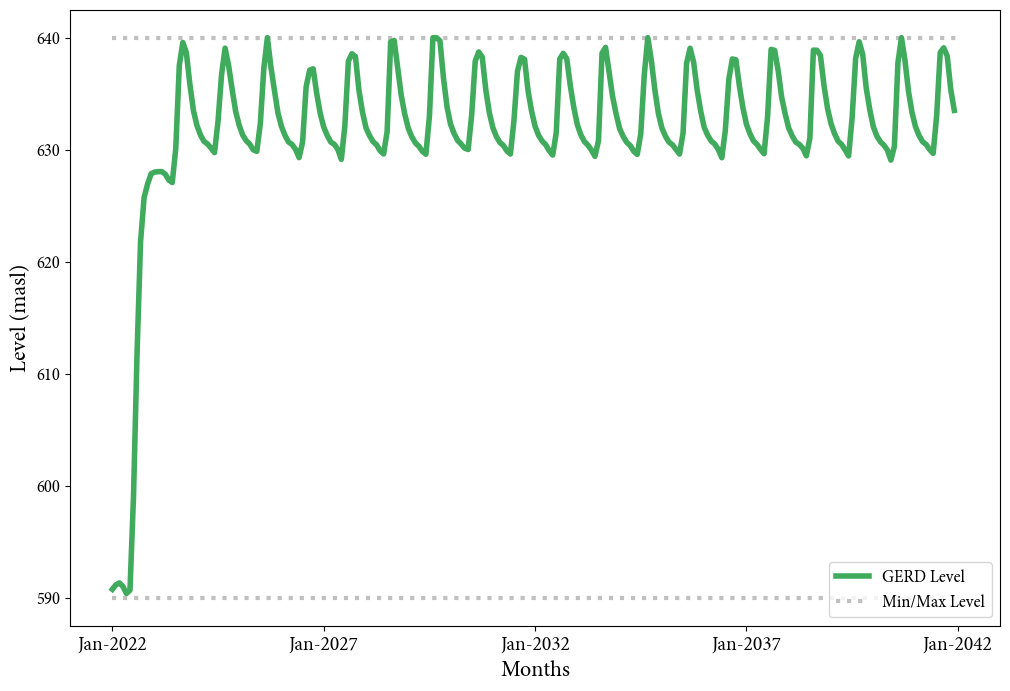

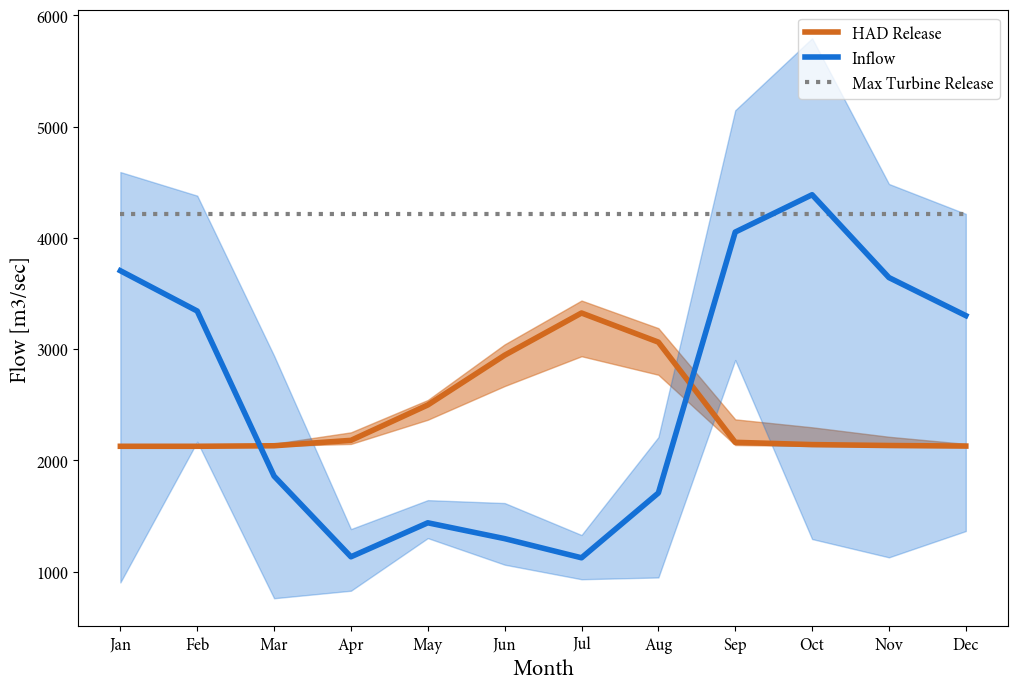

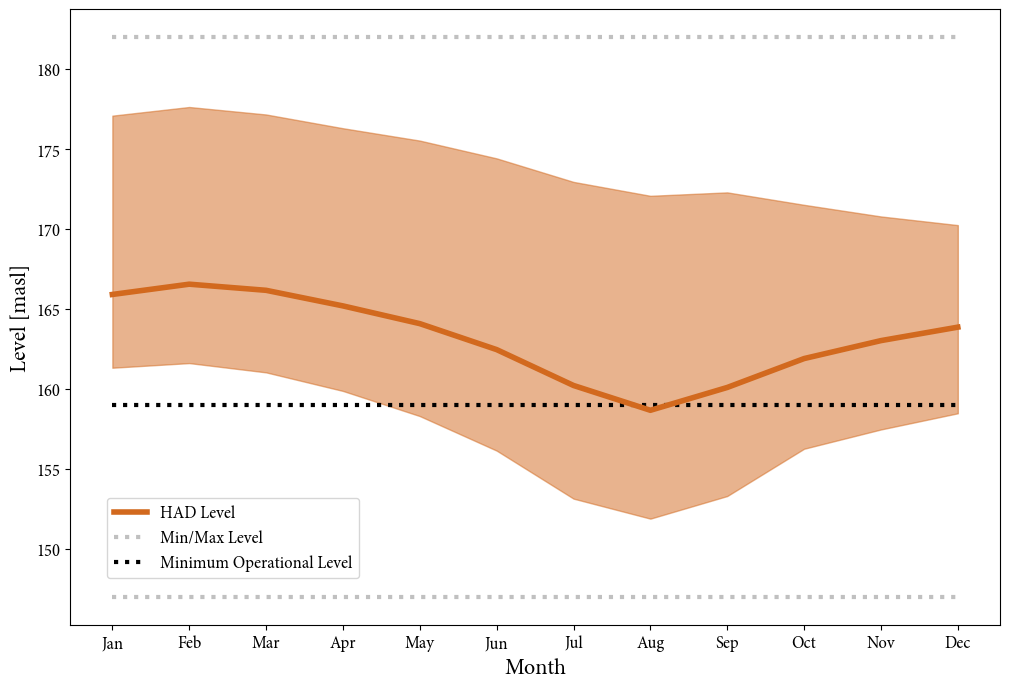

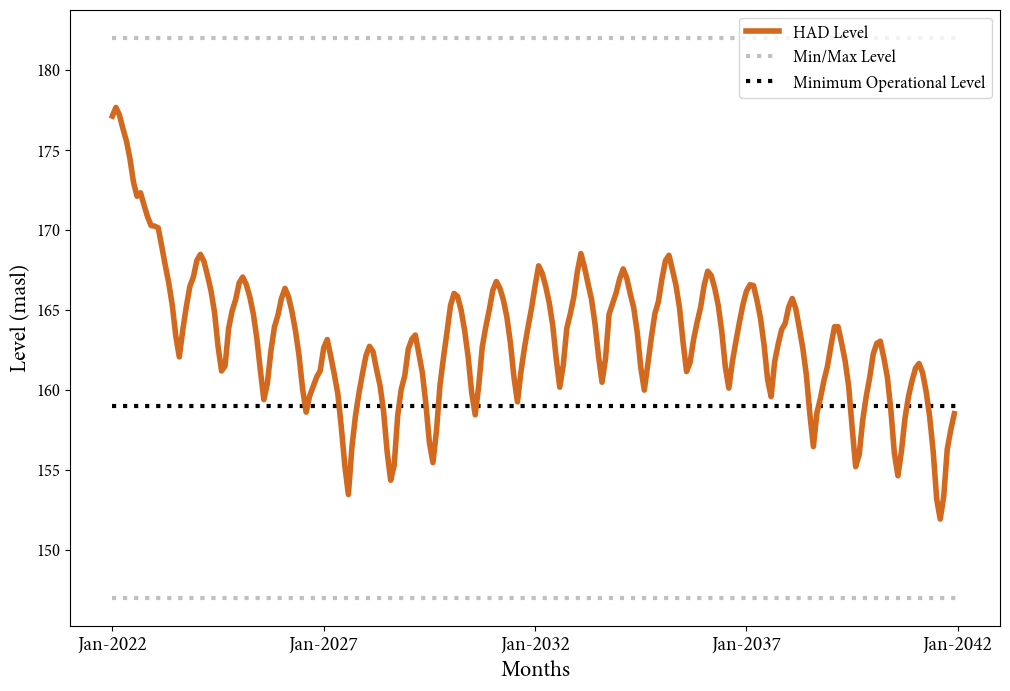

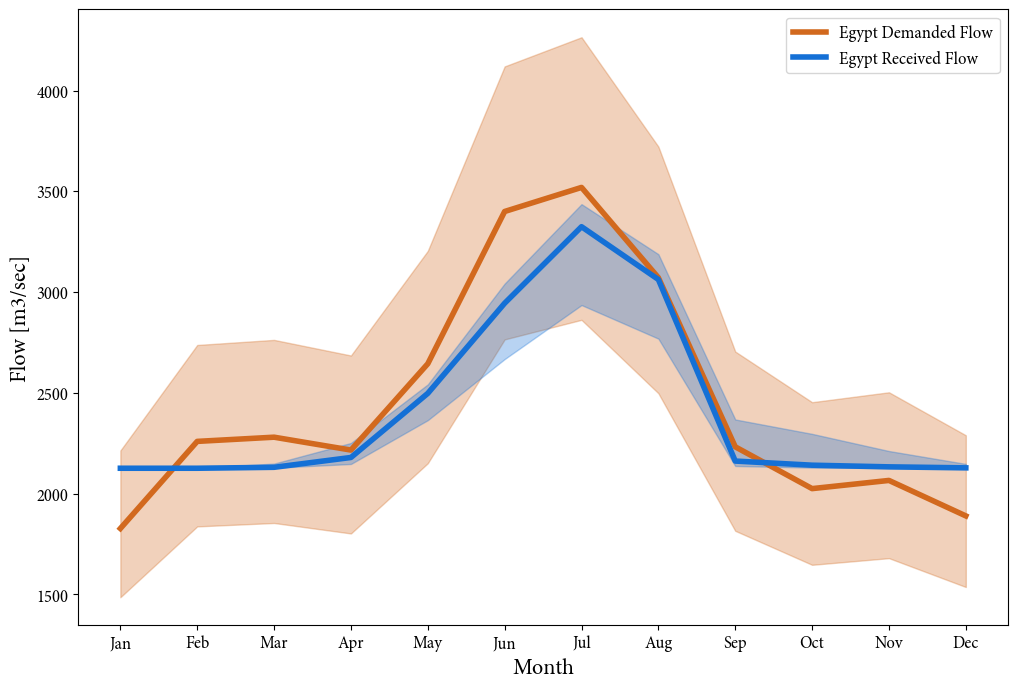

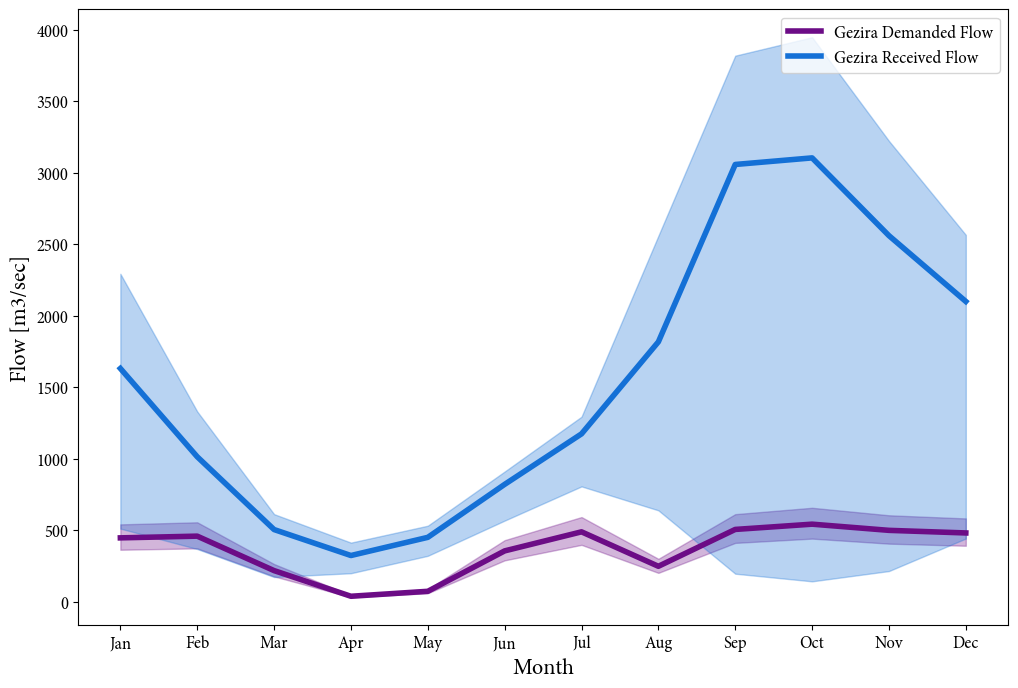

In [33]:
import importlib

importlib.reload(plotter)

for key, value in running_models.items():
    print("----------------")
    print(key)
    print("----------------")
    my_plotter = plotter.HydroModelPlotter(value)

    for dam in ["GERD", "HAD"]:
        my_plotter.plot_condensed_release_versus_inflow(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/release_vs_inflow_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_condensed_level(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/condensed_level_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

        my_plotter.plot_level_with_limits(dam)
        plt.savefig(
            f"../plots/baseline_optimization/{dam}/level_with_limits_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()

    for district in ["Egypt", "Gezira"]:
        my_plotter.plot_received_vs_demand_for_district_raw_condensed(district)
        plt.savefig(
            f"../plots/baseline_optimization/{district}/received_vs_demand_{key}_policy.svg",
        )  # bbox_inches="tight")
        plt.show()